In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = -1.25, 1.25
ymin, ymax = -1.25, 1.25

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf', 'ibmx', 'ibmy']
face_vars     = ['velc', 'hvar']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']
imbound_vars  = ['ibmf', 'velc', 'ibmx', 'ibmy']

scalar_info   = dict(tmax = 10, dt = 0.001, Re = 100.0, Re_s = 10.0, mu_s = 1.0)

simulation_info = dict(time_stepping = 'euler', poisson_solver = 'serial_direct', with_ib = False)

simulation_info = dict(time_stepping = 'euler', 
                       poisson_solver = 'serial_lu', 
                       maxiter = 2000,
                       tol = 1e-10,
                       with_ib = True,
                       ib_type = 'visco',
                       mapping_type = 'shapely',
                       ntrees = 20,
                       nquery_trees = 1,
                       nquery_trace = 2,
                       extp_iter = 200)

particle_info = [dict(input='HDF5', file='sm_body.00001.h5', vel = [0.0,-1.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(pres = ['neumann', 'neumann', 'neumann', 'neumann'],
                      ibmf = ['projection', 'projection', 'projection', 'projection'],
                      ibmx = ['projection', 'projection', 'projection', 'projection'],
                      ibmy = ['projection', 'projection', 'projection', 'projection'])

bc_val_center  = dict(pres = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 1.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, poisson_info=simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, imbound_info=simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, ins_info=simulation_info)

In [3]:
#simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')
imbound.map_to_grid()

Level Set Advection Time:  5.153701066970825
------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.754129841825745e-13
Total poisson time : 0.0005738735198974609
Total INS time : 1.2227880954742432
Max, Min, U   : 2.0, -0.0010189766617710871
Max, Min, V   : 0.0025564957572697545, -0.0025564957572697545
Max, Min, P   : 0.7298386308578837, -0.7272581778014362
Max, Min, DIV : 9.974659986866641e-17, -8.543513119185775e-17




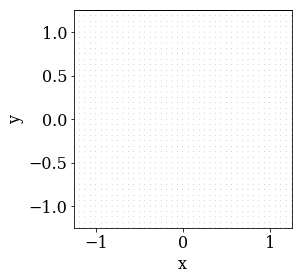

Level Set Advection Time:  0.15488290786743164
------------ Time = 0.001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.889260561868954e-13
Total poisson time : 0.0011391639709472656
Total INS time : 0.0027163028717041016
Max, Min, U   : 2.0, -0.0020224308699620425
Max, Min, V   : 0.005086968612143067, -0.005086968612143067
Max, Min, P   : 0.7318062500098219, -0.7210026870368232
Max, Min, DIV : 8.673617379884035e-17, -9.71445146547012e-17


Level Set Advection Time:  0.19355201721191406
------------ Time = 0.002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.674349785689797e-13
Total poisson time : 0.0012726783752441406
Total INS time : 0.00510406494140625
Max, Min, U   : 2.0, -0.0030120759077470966
Max, Min, V   : 0.0075916492433347645, -0.0075916492433347645
Max, Min, P   : 0.729594888456844, -0.7189572707577438
Max, Min, DIV : 1.249000902703301e-16, -7.806255641895632e-17


Level Set Advection Time:  0.16303992271

Level Set Advection Time:  0.0839390754699707
------------ Time = 0.01900000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.514800313175307e-13
Total poisson time : 0.0005538463592529297
Total INS time : 0.0037500858306884766
Max, Min, U   : 2.0, -0.0176454898215653
Max, Min, V   : 0.046539487030165486, -0.046539487030165486
Max, Min, P   : 0.6949822184082763, -0.6858952553471374
Max, Min, DIV : 1.7867651802561113e-16, -1.8388068845354155e-16


Level Set Advection Time:  0.10612034797668457
------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.08407897969622e-13
Total poisson time : 0.0007147789001464844
Total INS time : 0.004108905792236328
Max, Min, U   : 2.0, -0.018387024218228715
Max, Min, V   : 0.04863412307717928, -0.04863412307717928
Max, Min, P   : 0.6933702049034471, -0.6837888912963541
Max, Min, DIV : 1.457167719820518e-16, -1.8041124150158794e-16


Level Set Advect

Level Set Advection Time:  0.09691596031188965
------------ Time = 0.037000000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.675112261598052e-13
Total poisson time : 0.0014719963073730469
Total INS time : 0.006693840026855469
Max, Min, U   : 2.0, -0.029409706653161508
Max, Min, V   : 0.0813721890513775, -0.0813721890513775
Max, Min, P   : 0.6673114439287224, -0.6507056153222848
Max, Min, DIV : 4.128641872824801e-16, -3.5301622736128024e-16


Level Set Advection Time:  0.10109400749206543
------------ Time = 0.03800000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.848477519864229e-13
Total poisson time : 0.0019941329956054688
Total INS time : 0.007376909255981445
Max, Min, U   : 2.0, -0.029971112928601672
Max, Min, V   : 0.08314213213265678, -0.08314213213265678
Max, Min, P   : 0.6649504793625944, -0.6498156362953746
Max, Min, DIV : 4.0245584642661925e-16, -3.5128150388530344e-16


Level Set Advect

Level Set Advection Time:  0.10125589370727539
------------ Time = 0.05500000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.413152712354775e-13
Total poisson time : 0.001344919204711914
Total INS time : 0.005433797836303711
Max, Min, U   : 2.0, -0.03825343519949982
Max, Min, V   : 0.11094007811670041, -0.11094007811670041
Max, Min, P   : 0.6470306125655861, -0.616016088850279
Max, Min, DIV : 4.128641872824801e-16, -3.452099717193846e-16


Level Set Advection Time:  0.09859204292297363
------------ Time = 0.05600000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3458146835647977e-13
Total poisson time : 0.0014150142669677734
Total INS time : 0.004533052444458008
Max, Min, U   : 2.0, -0.038672894411709166
Max, Min, V   : 0.11245048200448764, -0.11245048200448764
Max, Min, P   : 0.645558478063713, -0.6146448300427637
Max, Min, DIV : 3.3306690738754696e-16, -3.9898639947466563e-16


Level Set Advection

Level Set Advection Time:  0.1048431396484375
------------ Time = 0.07300000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.04945345690366e-13
Total poisson time : 0.0011260509490966797
Total INS time : 0.005342960357666016
Max, Min, U   : 2.0, -0.04482980586825329
Max, Min, V   : 0.13628166021323124, -0.13628166021323124
Max, Min, P   : 0.6311966832619184, -0.5837689354756492
Max, Min, DIV : 5.377642775528102e-16, -7.563394355258879e-16


Level Set Advection Time:  0.10141205787658691
------------ Time = 0.07400000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0991596096593027e-13
Total poisson time : 0.0005230903625488281
Total INS time : 0.005255222320556641
Max, Min, U   : 2.0, -0.04513965145803639
Max, Min, V   : 0.13758264564897074, -0.13758264564897074
Max, Min, P   : 0.6291171637917995, -0.583361409902079
Max, Min, DIV : 6.967083160391851e-16, -8.465450562766819e-16


Level Set Advection Ti

Level Set Advection Time:  0.11246895790100098
------------ Time = 0.09000000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.574551052731268e-13
Total poisson time : 0.0010349750518798828
Total INS time : 0.004814863204956055
Max, Min, U   : 2.0, -0.05024123438154583
Max, Min, V   : 0.15705932514289653, -0.15705932514289653
Max, Min, P   : 0.617483577282943, -0.557620405882292
Max, Min, DIV : 5.724587470723463e-16, -7.892991815694472e-16


Level Set Advection Time:  0.09468507766723633
------------ Time = 0.09100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.950893923238815e-13
Total poisson time : 0.0014858245849609375
Total INS time : 0.005728960037231445
Max, Min, U   : 2.0, -0.050708376605765534
Max, Min, V   : 0.15819833255681426, -0.15819833255681426
Max, Min, P   : 0.6162161151620567, -0.5566965576792472
Max, Min, DIV : 7.008282842946301e-16, -7.4593109467002705e-16


Level Set Advection 

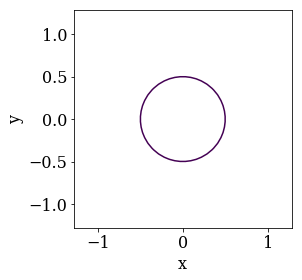

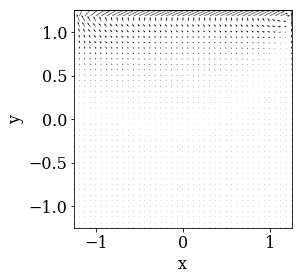

Level Set Advection Time:  0.12485408782958984
------------ Time = 0.10100000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9352734820474304e-13
Total poisson time : 0.0005421638488769531
Total INS time : 0.0018007755279541016
Max, Min, U   : 2.0, -0.055276812035425525
Max, Min, V   : 0.169129562318337, -0.169129562318337
Max, Min, P   : 0.6111229330130372, -0.5407521218348205
Max, Min, DIV : 7.754213937616328e-16, -7.546047120499111e-16


Level Set Advection Time:  0.10202193260192871
------------ Time = 0.10200000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.070912903968628e-13
Total poisson time : 0.0005080699920654297
Total INS time : 0.003592967987060547
Max, Min, U   : 2.0, -0.05572332581883239
Max, Min, V   : 0.17017872663300165, -0.17017872663300165
Max, Min, P   : 0.608740956822377, -0.5411153460883031
Max, Min, DIV : 8.187894806610529e-16, -7.216449660063518e-16


Level Set Advection Ti

Level Set Advection Time:  0.10249590873718262
------------ Time = 0.11800000000000009 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.8344589975224093e-13
Total poisson time : 0.0011641979217529297
Total INS time : 0.0047190189361572266
Max, Min, U   : 2.0, -0.06261065506976829
Max, Min, V   : 0.18597605059251598, -0.18597605059251598
Max, Min, P   : 0.6012456441366703, -0.5182784393381107
Max, Min, DIV : 7.147060721024445e-16, -7.164407955784213e-16


Level Set Advection Time:  0.09547114372253418
------------ Time = 0.11900000000000009 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6879159594782636e-13
Total poisson time : 0.0010619163513183594
Total INS time : 0.0045430660247802734
Max, Min, U   : 2.0, -0.06302500962432364
Max, Min, V   : 0.18690525965663188, -0.18690525965663188
Max, Min, P   : 0.601705229030043, -0.5160407630642467
Max, Min, DIV : 7.788908407135864e-16, -8.881784197001252e-16


Level Set Advecti

Level Set Advection Time:  0.10323405265808105
------------ Time = 0.1360000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3848529534680686e-13
Total poisson time : 0.0009331703186035156
Total INS time : 0.005217075347900391
Max, Min, U   : 2.0, -0.06977821216694824
Max, Min, V   : 0.20176819229642065, -0.20176819229642065
Max, Min, P   : 0.5943080233836264, -0.4951587273958681
Max, Min, DIV : 8.083811398051921e-16, -7.7021722333370235e-16


Level Set Advection Time:  0.09571504592895508
------------ Time = 0.1370000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6155783245439116e-13
Total poisson time : 0.0004200935363769531
Total INS time : 0.003729104995727539
Max, Min, U   : 2.0, -0.0701583440768696
Max, Min, V   : 0.20259086701687917, -0.20259086701687917
Max, Min, P   : 0.5937965908732012, -0.4941160407176173
Max, Min, DIV : 7.667477763817487e-16, -7.7021722333370235e-16


Level Set Advection

Level Set Advection Time:  0.09974288940429688
------------ Time = 0.1540000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1580973550372767e-13
Total poisson time : 0.0007498264312744141
Total INS time : 0.004381895065307617
Max, Min, U   : 2.0, -0.07633018443229574
Max, Min, V   : 0.21579130564029786, -0.21579130564029786
Max, Min, P   : 0.5872803017125576, -0.4759176286545319
Max, Min, DIV : 8.049116928532385e-16, -7.216449660063518e-16


Level Set Advection Time:  0.10221409797668457
------------ Time = 0.1550000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.297665534774811e-13
Total poisson time : 0.0017969608306884766
Total INS time : 0.005937337875366211
Max, Min, U   : 2.0, -0.07667619527409242
Max, Min, V   : 0.2165242589639265, -0.2165242589639265
Max, Min, P   : 0.5872253999284376, -0.4746144335788298
Max, Min, DIV : 7.494005416219807e-16, -5.828670879282072e-16


Level Set Advection Tim

Level Set Advection Time:  0.09838390350341797
------------ Time = 0.17200000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.085489912036679e-13
Total poisson time : 0.0009400844573974609
Total INS time : 0.003988027572631836
Max, Min, U   : 2.0, -0.08227090288113705
Max, Min, V   : 0.22831824308451812, -0.22831824308451812
Max, Min, P   : 0.5835591807847678, -0.4566848755416416
Max, Min, DIV : 7.771561172376096e-16, -7.494005416219807e-16


Level Set Advection Time:  0.10322785377502441
------------ Time = 0.17300000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1334013901015516e-13
Total poisson time : 0.001085042953491211
Total INS time : 0.005486965179443359
Max, Min, U   : 2.0, -0.08258318754177464
Max, Min, V   : 0.22897493564154187, -0.22897493564154187
Max, Min, P   : 0.5839943652192171, -0.45506306426534326
Max, Min, DIV : 8.153200337090993e-16, -7.216449660063518e-16


Level Set Advection

Level Set Advection Time:  0.09286308288574219
------------ Time = 0.18900000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1255742764019367e-13
Total poisson time : 0.00074005126953125
Total INS time : 0.004274845123291016
Max, Min, U   : 2.0, -0.08732881586063376
Max, Min, V   : 0.23897354061527165, -0.23897354061527165
Max, Min, P   : 0.5812243999012465, -0.44000931720922765
Max, Min, DIV : 1.0234868508263162e-15, -1.0894063429134349e-15


Level Set Advection Time:  0.09983181953430176
------------ Time = 0.19000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.000816996421874e-13
Total poisson time : 0.0012969970703125
Total INS time : 0.00779414176940918
Max, Min, U   : 2.0, -0.08760985942192658
Max, Min, V   : 0.2395682178220307, -0.2395682178220307
Max, Min, P   : 0.5803465987149797, -0.4398425940474662
Max, Min, DIV : 8.153200337090993e-16, -1.4259426972529354e-15


Level Set Advection Tim

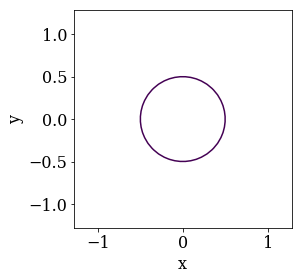

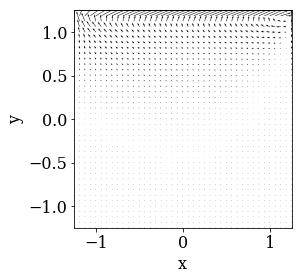

Level Set Advection Time:  0.10391926765441895
------------ Time = 0.20100000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.888022207513329e-13
Total poisson time : 0.00047898292541503906
Total INS time : 0.0012810230255126953
Max, Min, U   : 2.0, -0.09058221994280999
Max, Min, V   : 0.24589207530134186, -0.24589207530134186
Max, Min, P   : 0.5785178861819835, -0.4306843408802816
Max, Min, DIV : 1.3912482277333993e-15, -1.6861512186494565e-15


Level Set Advection Time:  0.10235118865966797
------------ Time = 0.20200000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0253182956370444e-13
Total poisson time : 0.0011019706726074219
Total INS time : 0.007482051849365234
Max, Min, U   : 2.0, -0.09084168391447439
Max, Min, V   : 0.2464478581593852, -0.2464478581593852
Max, Min, P   : 0.5811787017650302, -0.42706895855997024
Max, Min, DIV : 1.4988010832439613e-15, -1.1934897514720433e-15


Level Set Adve

Level Set Advection Time:  0.09559869766235352
------------ Time = 0.21800000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7665647428504356e-13
Total poisson time : 0.0012810230255126953
Total INS time : 0.005618095397949219
Max, Min, U   : 2.0, -0.09475356892087365
Max, Min, V   : 0.2549372725751432, -0.2549372725751432
Max, Min, P   : 0.5781693078134064, -0.4157406181288801
Max, Min, DIV : 1.2073675392798577e-15, -1.3856103764364747e-15


Level Set Advection Time:  0.12258315086364746
------------ Time = 0.21900000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.907839977831347e-13
Total poisson time : 0.001310110092163086
Total INS time : 0.006559133529663086
Max, Min, U   : 2.0, -0.09498326885252478
Max, Min, V   : 0.2554437847991164, -0.2554437847991164
Max, Min, P   : 0.5783338822785307, -0.41473581909967205
Max, Min, DIV : 1.3530843112619095e-15, -1.2351231148954867e-15


Level Set Advection

Level Set Advection Time:  0.09409403800964355
------------ Time = 0.23700000000000018 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.618972578657293e-13
Total poisson time : 0.00047898292541503906
Total INS time : 0.004086017608642578
Max, Min, U   : 2.0, -0.09882775088552088
Max, Min, V   : 0.2641164401170252, -0.2641164401170252
Max, Min, P   : 0.5751610043463353, -0.4038147047058108
Max, Min, DIV : 9.992007221626409e-16, -1.1587952819525071e-15


Level Set Advection Time:  0.09365296363830566
------------ Time = 0.23800000000000018 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8774211467537424e-13
Total poisson time : 0.0006990432739257812
Total INS time : 0.0036039352416992188
Max, Min, U   : 2.0, -0.09902546755950692
Max, Min, V   : 0.2645747054552101, -0.2645747054552101
Max, Min, P   : 0.5731952979492639, -0.40505184238750047
Max, Min, DIV : 1.304512053934559e-15, -1.1310397063368782e-15


Level Set Advectio

Level Set Advection Time:  0.0916590690612793
------------ Time = 0.25400000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6201134669156445e-13
Total poisson time : 0.0012578964233398438
Total INS time : 0.006117105484008789
Max, Min, U   : 2.0, -0.10196842108936907
Max, Min, V   : 0.2715961209494434, -0.2715961209494434
Max, Min, P   : 0.5748012443686563, -0.392502593751312
Max, Min, DIV : 1.3253287356462806e-15, -1.3600232051658168e-15


Level Set Advection Time:  0.0872199535369873
------------ Time = 0.25500000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.448114656101513e-13
Total poisson time : 0.0008630752563476562
Total INS time : 0.0038232803344726562
Max, Min, U   : 2.0, -0.10213879480764382
Max, Min, V   : 0.27201630443636643, -0.27201630443636643
Max, Min, P   : 0.5745906879203312, -0.39207184286492536
Max, Min, DIV : 1.7061005386231898e-15, -1.4779844015322396e-15


Level Set Advectio

Level Set Advection Time:  0.08752608299255371
------------ Time = 0.2710000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5219587014385776e-13
Total poisson time : 0.0018391609191894531
Total INS time : 0.0057637691497802734
Max, Min, U   : 2.0, -0.10465447905897926
Max, Min, V   : 0.27846162351844017, -0.27846162351844017
Max, Min, P   : 0.574777145129642, -0.3822528539884808
Max, Min, DIV : 1.4016565685892601e-15, -1.3877787807814457e-15


Level Set Advection Time:  0.08574891090393066
------------ Time = 0.2720000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7968943114064254e-13
Total poisson time : 0.000579833984375
Total INS time : 0.003217935562133789
Max, Min, U   : 2.0, -0.1047987990442321
Max, Min, V   : 0.2788477605287431, -0.2788477605287431
Max, Min, P   : 0.5753087790445176, -0.3811567363777194
Max, Min, DIV : 1.2156074757907476e-15, -1.1449174941446927e-15


Level Set Advection Tim

Level Set Advection Time:  0.12330102920532227
------------ Time = 0.2890000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5145632700237643e-13
Total poisson time : 0.0008800029754638672
Total INS time : 0.0037949085235595703
Max, Min, U   : 2.0, -0.10702792596731989
Max, Min, V   : 0.28513214345538684, -0.28513214345538684
Max, Min, P   : 0.5744769822503052, -0.37301334151974386
Max, Min, DIV : 1.394717674685353e-15, -1.4016565685892601e-15


Level Set Advection Time:  0.08657717704772949
------------ Time = 0.2900000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5221145312275027e-13
Total poisson time : 0.0008120536804199219
Total INS time : 0.00481414794921875
Max, Min, U   : 2.0, -0.1071461252774646
Max, Min, V   : 0.2854859700139129, -0.2854859700139129
Max, Min, P   : 0.5730675833261978, -0.37392963345000546
Max, Min, DIV : 1.672273430841642e-15, -1.5265566588595902e-15


Level Set Advection

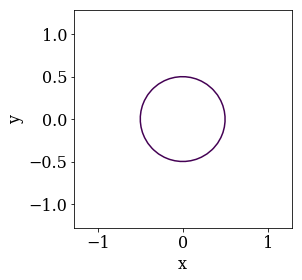

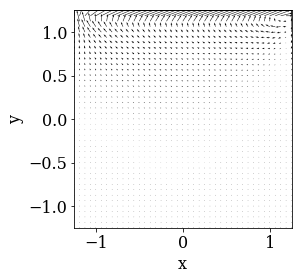

Level Set Advection Time:  0.10218286514282227
------------ Time = 0.3010000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.396661103172484e-13
Total poisson time : 0.0005769729614257812
Total INS time : 0.0017561912536621094
Max, Min, U   : 2.0, -0.10835456413022368
Max, Min, V   : 0.28926842340665204, -0.28926842340665204
Max, Min, P   : 0.5723834717231555, -0.369427285019228
Max, Min, DIV : 1.4155343563970746e-15, -1.4432899320127035e-15


Level Set Advection Time:  0.08467316627502441
------------ Time = 0.3020000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.332245130906463e-13
Total poisson time : 0.0008640289306640625
Total INS time : 0.004136800765991211
Max, Min, U   : 2.0, -0.10845620536500472
Max, Min, V   : 0.289602565431102, -0.289602565431102
Max, Min, P   : 0.5703796720185168, -0.37098051384891834
Max, Min, DIV : 1.1900203045200897e-15, -1.457167719820518e-15


Level Set Advection Ti

Level Set Advection Time:  0.14101600646972656
------------ Time = 0.3180000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2717038186688418e-13
Total poisson time : 0.0006220340728759766
Total INS time : 0.011576175689697266
Max, Min, U   : 2.0, -0.10990230232133381
Max, Min, V   : 0.2947400561738685, -0.2947400561738685
Max, Min, P   : 0.5760271297940268, -0.35856658486231296
Max, Min, DIV : 1.27675647831893e-15, -1.6497220256539435e-15


Level Set Advection Time:  0.11755013465881348
------------ Time = 0.31900000000000023 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.319447166148514e-13
Total poisson time : 0.0005919933319091797
Total INS time : 0.003618001937866211
Max, Min, U   : 2.0, -0.10998166777317049
Max, Min, V   : 0.29504853484352334, -0.29504853484352334
Max, Min, P   : 0.5752917479834874, -0.3589055262943818
Max, Min, DIV : 1.27675647831893e-15, -1.5543122344752192e-15


Level Set Advection T

Level Set Advection Time:  0.09465169906616211
------------ Time = 0.33600000000000024 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3124340486177255e-13
Total poisson time : 0.0007731914520263672
Total INS time : 0.0036001205444335938
Max, Min, U   : 2.0, -0.11182026521156387
Max, Min, V   : 0.30007938555494423, -0.30007938555494423
Max, Min, P   : 0.5720909211810035, -0.3558049913356612
Max, Min, DIV : 1.3981871216373065e-15, -1.4883927423881005e-15


Level Set Advection Time:  0.12868809700012207
------------ Time = 0.33700000000000024 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2337587583538544e-13
Total poisson time : 0.000514984130859375
Total INS time : 0.005249977111816406
Max, Min, U   : 2.0, -0.11203633825882046
Max, Min, V   : 0.3003631943192968, -0.3003631943192968
Max, Min, P   : 0.5782096727325647, -0.3493401694238926
Max, Min, DIV : 1.582067810090848e-15, -1.4918621893400541e-15


Level Set Advecti

Level Set Advection Time:  0.10085177421569824
------------ Time = 0.35500000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.019094525739963e-13
Total poisson time : 0.0005567073822021484
Total INS time : 0.0035858154296875
Max, Min, U   : 2.0, -0.11579102318637798
Max, Min, V   : 0.3052584501615974, -0.3052584501615974
Max, Min, P   : 0.5766454664678876, -0.3445270999240294
Max, Min, DIV : 1.6115581091824538e-15, -1.1102230246251565e-15


Level Set Advection Time:  0.10130977630615234
------------ Time = 0.35600000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2408161825172545e-13
Total poisson time : 0.0038499832153320312
Total INS time : 0.0111541748046875
Max, Min, U   : 2.0, -0.11599198599638369
Max, Min, V   : 0.30551945779746875, -0.30551945779746875
Max, Min, P   : 0.5763241022010268, -0.3445661493204067
Max, Min, DIV : 1.4970663597679845e-15, -1.695692197767329e-15


Level Set Advection Ti

Level Set Advection Time:  0.09689688682556152
------------ Time = 0.3730000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1216287048809266e-13
Total poisson time : 0.0009648799896240234
Total INS time : 0.005753040313720703
Max, Min, U   : 2.0, -0.11929028491786414
Max, Min, V   : 0.3097809215120852, -0.3097809215120852
Max, Min, P   : 0.5737061537155858, -0.34240606066643675
Max, Min, DIV : 1.2490009027033011e-15, -1.3322676295501878e-15


Level Set Advection Time:  0.09826278686523438
------------ Time = 0.3740000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2404896466070688e-13
Total poisson time : 0.0005891323089599609
Total INS time : 0.005248069763183594
Max, Min, U   : 2.0, -0.11947780082954668
Max, Min, V   : 0.31002120391335936, -0.31002120391335936
Max, Min, P   : 0.5794444918855289, -0.3357457015942534
Max, Min, DIV : 1.4988010832439613e-15, -1.6375789613221059e-15


Level Set Advecti

Level Set Advection Time:  0.10202693939208984
------------ Time = 0.3920000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1261627223763562e-13
Total poisson time : 0.0005030632019042969
Total INS time : 0.0035791397094726562
Max, Min, U   : 2.0, -0.1227141313452641
Max, Min, V   : 0.31415816516171674, -0.31415816516171674
Max, Min, P   : 0.5759768269754767, -0.33529442514491525
Max, Min, DIV : 1.1934897514720433e-15, -1.4224732503009818e-15


Level Set Advection Time:  0.09547710418701172
------------ Time = 0.3930000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.031928268760253e-13
Total poisson time : 0.000911712646484375
Total INS time : 0.004183769226074219
Max, Min, U   : 2.0, -0.12288649535770796
Max, Min, V   : 0.314378226141842, -0.314378226141842
Max, Min, P   : 0.5769153811886936, -0.3341228762310508
Max, Min, DIV : 1.2385925618474403e-15, -1.2212453270876722e-15


Level Set Advection T

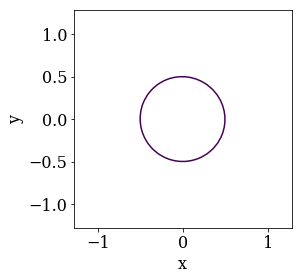

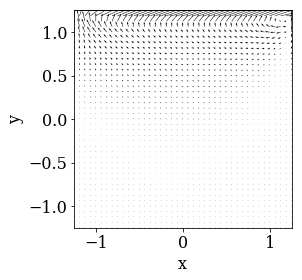

Level Set Advection Time:  0.08748292922973633
------------ Time = 0.4010000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.131013553131333e-13
Total poisson time : 0.0012276172637939453
Total INS time : 0.002880096435546875
Max, Min, U   : 2.0, -0.1242373779483317
Max, Min, V   : 0.3161037816430771, -0.3161037816430771
Max, Min, P   : 0.5747637316216696, -0.33448524356958664
Max, Min, DIV : 1.3808398868775384e-15, -1.2212453270876722e-15


Level Set Advection Time:  0.1009361743927002
------------ Time = 0.4020000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0219267650420065e-13
Total poisson time : 0.0006902217864990234
Total INS time : 0.003915071487426758
Max, Min, U   : 2.0, -0.12440273857047301
Max, Min, V   : 0.3163151782034676, -0.3163151782034676
Max, Min, P   : 0.5781769388681856, -0.33085581422559296
Max, Min, DIV : 1.2888995426507677e-15, -1.3565537582138631e-15


Level Set Advection T

Level Set Advection Time:  0.09807801246643066
------------ Time = 0.4190000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.009627294750433e-13
Total poisson time : 0.0008771419525146484
Total INS time : 0.00464630126953125
Max, Min, U   : 2.0, -0.1270953257804843
Max, Min, V   : 0.3197686326287995, -0.3197686326287995
Max, Min, P   : 0.579816045287197, -0.3257784701374672
Max, Min, DIV : 1.4779844015322396e-15, -1.2437967322753707e-15


Level Set Advection Time:  0.08457612991333008
------------ Time = 0.4200000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9033975051164635e-13
Total poisson time : 0.0007092952728271484
Total INS time : 0.0038950443267822266
Max, Min, U   : 2.0, -0.1272467630281261
Max, Min, V   : 0.3199637660386298, -0.3199637660386298
Max, Min, P   : 0.5781346782483492, -0.32727094683871755
Max, Min, DIV : 1.592476150946709e-15, -1.4432899320127035e-15


Level Set Advection Time

Level Set Advection Time:  0.09008979797363281
------------ Time = 0.43600000000000033 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0388067176488915e-13
Total poisson time : 0.0006482601165771484
Total INS time : 0.003744840621948242
Max, Min, U   : 2.0, -0.12956547660473355
Max, Min, V   : 0.32297104836632906, -0.32297104836632906
Max, Min, P   : 0.5816349116866781, -0.32093480396176804
Max, Min, DIV : 1.27675647831893e-15, -1.1744077932362984e-15


Level Set Advection Time:  0.08368730545043945
------------ Time = 0.43700000000000033 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9905324301607012e-13
Total poisson time : 0.0008449554443359375
Total INS time : 0.0043201446533203125
Max, Min, U   : 2.0, -0.12970390708721738
Max, Min, V   : 0.3231520205193023, -0.3231520205193023
Max, Min, P   : 0.577437344881373, -0.3249662918579482
Max, Min, DIV : 1.3322676295501878e-15, -1.1102230246251565e-15


Level Set Advecti

Level Set Advection Time:  0.09454631805419922
------------ Time = 0.45400000000000035 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0084549059607634e-13
Total poisson time : 0.000843048095703125
Total INS time : 0.002888917922973633
Max, Min, U   : 2.0, -0.1319415167530974
Max, Min, V   : 0.3261091824784202, -0.3261091824784202
Max, Min, P   : 0.5843734578609032, -0.3153925210417321
Max, Min, DIV : 1.1934897514720433e-15, -1.0148132334464322e-15


Level Set Advection Time:  0.08706903457641602
------------ Time = 0.45500000000000035 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0832593879707987e-13
Total poisson time : 0.0008969306945800781
Total INS time : 0.0046939849853515625
Max, Min, U   : 2.0, -0.13206637441139685
Max, Min, V   : 0.32627631017882924, -0.32627631017882924
Max, Min, P   : 0.577659205548766, -0.32196206928117865
Max, Min, DIV : 1.384309333829492e-15, -1.4641066137244252e-15


Level Set Advectio

Level Set Advection Time:  0.08258509635925293
------------ Time = 0.47100000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.865763063173158e-13
Total poisson time : 0.0007297992706298828
Total INS time : 0.0036830902099609375
Max, Min, U   : 2.0, -0.13396302768439947
Max, Min, V   : 0.32885237683534274, -0.32885237683534274
Max, Min, P   : 0.5757389605655495, -0.3217130867670259
Max, Min, DIV : 1.6375789613221059e-15, -1.1553258350005535e-15


Level Set Advection Time:  0.11524724960327148
------------ Time = 0.47200000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8314632748763957e-13
Total poisson time : 0.0015239715576171875
Total INS time : 0.0046803951263427734
Max, Min, U   : 2.0, -0.13407529380869226
Max, Min, V   : 0.32900741959814034, -0.32900741959814034
Max, Min, P   : 0.574519489239161, -0.32280574002099016
Max, Min, DIV : 1.3010426069826053e-15, -1.27675647831893e-15


Level Set Advec

Level Set Advection Time:  0.08548569679260254
------------ Time = 0.4900000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9005645068619713e-13
Total poisson time : 0.0005340576171875
Total INS time : 0.003715038299560547
Max, Min, U   : 2.0, -0.13597161463180568
Max, Min, V   : 0.33168432328589287, -0.33168432328589287
Max, Min, P   : 0.5863280571692868, -0.30887716313610747
Max, Min, DIV : 1.5673226605450452e-15, -1.609823385706477e-15


Level Set Advection Time:  0.08113312721252441
------------ Time = 0.4910000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8175104995897235e-13
Total poisson time : 0.0008177757263183594
Total INS time : 0.003947734832763672
Max, Min, U   : 2.0, -0.1360701102251097
Max, Min, V   : 0.3318268983614502, -0.3318268983614502
Max, Min, P   : 0.5873085362001982, -0.307787545492628
Max, Min, DIV : 1.4481688417888883e-15, -1.6792123247455493e-15


Level Set Advection Tim

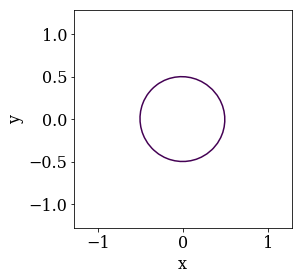

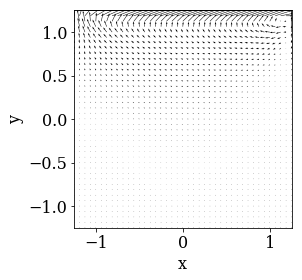

Level Set Advection Time:  0.09318923950195312
------------ Time = 0.5010000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8624439857486175e-13
Total poisson time : 0.0004801750183105469
Total INS time : 0.0014781951904296875
Max, Min, U   : 2.0, -0.1370158969516755
Max, Min, V   : 0.33321858173786156, -0.33321858173786156
Max, Min, P   : 0.5865404771284363, -0.30751106076027224
Max, Min, DIV : 1.6583956430338276e-15, -1.532628191025509e-15


Level Set Advection Time:  0.083648681640625
------------ Time = 0.5020000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8004966254071025e-13
Total poisson time : 0.0010380744934082031
Total INS time : 0.00426793098449707
Max, Min, U   : 2.0, -0.13710658111621016
Max, Min, V   : 0.33335440282863404, -0.33335440282863404
Max, Min, P   : 0.583593521394509, -0.31035814398799266
Max, Min, DIV : 1.2212453270876722e-15, -1.304512053934559e-15


Level Set Advection 

Level Set Advection Time:  0.10943222045898438
------------ Time = 0.5190000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7676375015278692e-13
Total poisson time : 0.0010738372802734375
Total INS time : 0.005572080612182617
Max, Min, U   : 2.0, -0.13854050812942612
Max, Min, V   : 0.3355745505291126, -0.3355745505291126
Max, Min, P   : 0.5811917680416158, -0.31149025751123915
Max, Min, DIV : 1.7069679003611782e-15, -1.6930901125533637e-15


Level Set Advection Time:  0.0826568603515625
------------ Time = 0.5200000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7136876651925522e-13
Total poisson time : 0.0007460117340087891
Total INS time : 0.004065036773681641
Max, Min, U   : 2.0, -0.1386186337525178
Max, Min, V   : 0.3357000414295772, -0.3357000414295772
Max, Min, P   : 0.5889266023846391, -0.30366985813531233
Max, Min, DIV : 1.5579714168073577e-15, -1.6479873021779667e-15


Level Set Advection 

Level Set Advection Time:  0.0824439525604248
------------ Time = 0.5370000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7190097323703415e-13
Total poisson time : 0.0006749629974365234
Total INS time : 0.0034928321838378906
Max, Min, U   : 2.0, -0.1398429022634769
Max, Min, V   : 0.3377506513798815, -0.3377506513798815
Max, Min, P   : 0.5910432765600198, -0.3002044584951307
Max, Min, DIV : 1.5751289161869408e-15, -1.3079815008865125e-15


Level Set Advection Time:  0.08096075057983398
------------ Time = 0.5380000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.854878132464132e-13
Total poisson time : 0.0005660057067871094
Total INS time : 0.0027251243591308594
Max, Min, U   : 2.0, -0.13990887425106954
Max, Min, V   : 0.33786654155694335, -0.33786654155694335
Max, Min, P   : 0.5913744864996213, -0.29979988681042935
Max, Min, DIV : 1.3877787807814457e-15, -1.609823385706477e-15


Level Set Advection

Level Set Advection Time:  0.0839989185333252
------------ Time = 0.5550000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6916696368230336e-13
Total poisson time : 0.0005140304565429688
Total INS time : 0.003924846649169922
Max, Min, U   : 2.0, -0.14092977454277472
Max, Min, V   : 0.33976019386579437, -0.33976019386579437
Max, Min, P   : 0.5878563356632789, -0.302165033704756
Max, Min, DIV : 1.2628786905111156e-15, -1.5543122344752192e-15


Level Set Advection Time:  0.08109092712402344
------------ Time = 0.5560000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7065242682120306e-13
Total poisson time : 0.0009541511535644531
Total INS time : 0.003359079360961914
Max, Min, U   : 2.0, -0.14098397776907792
Max, Min, V   : 0.3398672088997149, -0.3398672088997149
Max, Min, P   : 0.5879778442139416, -0.3019810171506753
Max, Min, DIV : 1.205632815803881e-15, -1.3322676295501878e-15


Level Set Advection T

Level Set Advection Time:  0.089141845703125
------------ Time = 0.5730000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.967336581327147e-13
Total poisson time : 0.0005602836608886719
Total INS time : 0.0030031204223632812
Max, Min, U   : 2.0, -0.1418081994816541
Max, Min, V   : 0.34207634722012686, -0.34207634722012686
Max, Min, P   : 0.6001518664195594, -0.28882820115686303
Max, Min, DIV : 1.2906342661267445e-15, -1.4710455076283324e-15


Level Set Advection Time:  0.07979202270507812
------------ Time = 0.5740000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6504121088453142e-13
Total poisson time : 0.00140380859375
Total INS time : 0.00396418571472168
Max, Min, U   : 2.0, -0.14185103536670626
Max, Min, V   : 0.3422988224314763, -0.3422988224314763
Max, Min, P   : 0.5934094665858523, -0.295517761473822
Max, Min, DIV : 1.3877787807814457e-15, -1.3877787807814457e-15


Level Set Advection Time:  

Level Set Advection Time:  0.08222007751464844
------------ Time = 0.5910000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6820531992102587e-13
Total poisson time : 0.0007848739624023438
Total INS time : 0.0037126541137695312
Max, Min, U   : 2.0, -0.1424883148408521
Max, Min, V   : 0.3459909701830105, -0.3459909701830105
Max, Min, P   : 0.5976247868761744, -0.2896011550205704
Max, Min, DIV : 1.5404344466674047e-15, -1.4363510381087963e-15


Level Set Advection Time:  0.0812840461730957
------------ Time = 0.5920000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8710569948800422e-13
Total poisson time : 0.0007531642913818359
Total INS time : 0.0039000511169433594
Max, Min, U   : 2.0, -0.14252061995520465
Max, Min, V   : 0.34620294335783947, -0.34620294335783947
Max, Min, P   : 0.5959526214256512, -0.29119156402796675
Max, Min, DIV : 1.5126788710517758e-15, -1.3322676295501878e-15


Level Set Advecti

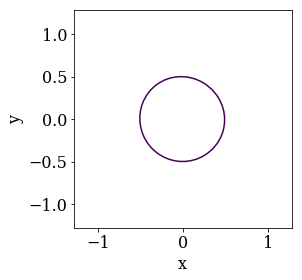

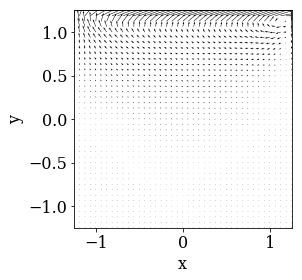

Level Set Advection Time:  0.0865626335144043
------------ Time = 0.6010000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.656774516550355e-13
Total poisson time : 0.00039196014404296875
Total INS time : 0.0011568069458007812
Max, Min, U   : 2.0, -0.14278423525877781
Max, Min, V   : 0.3480856585966265, -0.3480856585966265
Max, Min, P   : 0.5867025961492931, -0.30010479948559426
Max, Min, DIV : 1.3322676295501878e-15, -1.457167719820518e-15


Level Set Advection Time:  0.07971787452697754
------------ Time = 0.6020000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0321133606120125e-13
Total poisson time : 0.0010089874267578125
Total INS time : 0.003740072250366211
Max, Min, U   : 2.0, -0.14281058194842816
Max, Min, V   : 0.34829211865100157, -0.34829211865100157
Max, Min, P   : 0.6016013833344442, -0.2851714128195825
Max, Min, DIV : 1.5126788710517758e-15, -1.5265566588595902e-15


Level Set Advectio

Level Set Advection Time:  0.08324003219604492
------------ Time = 0.6190000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.71880437661911e-13
Total poisson time : 0.00067901611328125
Total INS time : 0.003667116165161133
Max, Min, U   : 2.0, -0.14316987176758297
Max, Min, V   : 0.3517211240410581, -0.3517211240410581
Max, Min, P   : 0.5937999174830566, -0.29243086529394335
Max, Min, DIV : 1.3513495877859327e-15, -1.5681900222830336e-15


Level Set Advection Time:  0.07965993881225586
------------ Time = 0.6200000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7437967526057154e-13
Total poisson time : 0.0005679130554199219
Total INS time : 0.003679037094116211
Max, Min, U   : 2.0, -0.1431858792221532
Max, Min, V   : 0.3519181569161806, -0.3519181569161806
Max, Min, P   : 0.6017036624674268, -0.2844997923042374
Max, Min, DIV : 1.5543122344752192e-15, -1.4710455076283324e-15


Level Set Advection Time

Level Set Advection Time:  0.08557271957397461
------------ Time = 0.6370000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6949896152080896e-13
Total poisson time : 0.0005300045013427734
Total INS time : 0.0038230419158935547
Max, Min, U   : 2.0, -0.1433732559168696
Max, Min, V   : 0.35519086045958603, -0.35519086045958603
Max, Min, P   : 0.5894384479755139, -0.29635743881413557
Max, Min, DIV : 1.5543122344752192e-15, -1.5543122344752192e-15


Level Set Advection Time:  0.08404111862182617
------------ Time = 0.6380000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.582471796341779e-13
Total poisson time : 0.0005466938018798828
Total INS time : 0.0036878585815429688
Max, Min, U   : 2.0, -0.14337936847468832
Max, Min, V   : 0.3553789329314629, -0.3553789329314629
Max, Min, P   : 0.6035587200647521, -0.2822164203878778
Max, Min, DIV : 1.6132928326584306e-15, -1.1080546202801855e-15


Level Set Advecti

Level Set Advection Time:  0.08582496643066406
------------ Time = 0.6550000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6356217373461733e-13
Total poisson time : 0.0005369186401367188
Total INS time : 0.003484964370727539
Max, Min, U   : 2.0, -0.14547674878741426
Max, Min, V   : 0.3585031743483013, -0.3585031743483013
Max, Min, P   : 0.5992880505775064, -0.2861855942946066
Max, Min, DIV : 1.5243882545146192e-15, -1.4432899320127035e-15


Level Set Advection Time:  0.08294200897216797
------------ Time = 0.6560000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7050066733097872e-13
Total poisson time : 0.0008590221405029297
Total INS time : 0.0049571990966796875
Max, Min, U   : 2.0, -0.14560485667380477
Max, Min, V   : 0.35868273678718776, -0.35868273678718776
Max, Min, P   : 0.5906732660823312, -0.29478554428989157
Max, Min, DIV : 1.2750217548429532e-15, -1.2177758801357186e-15


Level Set Advect

Level Set Advection Time:  0.08477997779846191
------------ Time = 0.6730000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6249947000104967e-13
Total poisson time : 0.0006649494171142578
Total INS time : 0.003622770309448242
Max, Min, U   : 2.0, -0.14772476192026263
Max, Min, V   : 0.3616659729428034, -0.3616659729428034
Max, Min, P   : 0.5973479992637829, -0.28790483187281685
Max, Min, DIV : 1.3361707573711357e-15, -1.304512053934559e-15


Level Set Advection Time:  0.07915496826171875
------------ Time = 0.6740000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5076735657679865e-13
Total poisson time : 0.0007381439208984375
Total INS time : 0.004223346710205078
Max, Min, U   : 2.0, -0.1478460518918698
Max, Min, V   : 0.361837452633782, -0.361837452633782
Max, Min, P   : 0.5967856328518761, -0.28845770092876283
Max, Min, DIV : 1.3322676295501878e-15, -1.0685896612017132e-15


Level Set Advection Ti

Level Set Advection Time:  0.08229184150695801
------------ Time = 0.6910000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6934221521019357e-13
Total poisson time : 0.0007510185241699219
Total INS time : 0.0037598609924316406
Max, Min, U   : 2.0, -0.14984995681337415
Max, Min, V   : 0.36468676452208404, -0.36468676452208404
Max, Min, P   : 0.6055401215052862, -0.27984256079593417
Max, Min, DIV : 1.3322676295501878e-15, -1.6930901125533637e-15


Level Set Advection Time:  0.08301305770874023
------------ Time = 0.6920000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.668152740352085e-13
Total poisson time : 0.0007791519165039062
Total INS time : 0.0038170814514160156
Max, Min, U   : 2.0, -0.14996442097928897
Max, Min, V   : 0.3648505671580099, -0.3648505671580099
Max, Min, P   : 0.5984440234174238, -0.28693658275017164
Max, Min, DIV : 1.3322676295501878e-15, -1.5681900222830336e-15


Level Set Advec

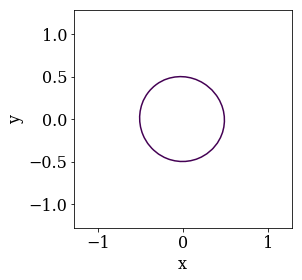

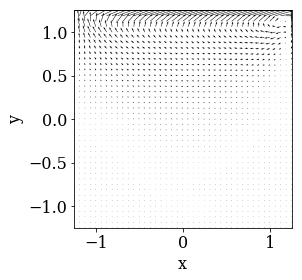

Level Set Advection Time:  0.0805811882019043
------------ Time = 0.7010000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7305178020216048e-13
Total poisson time : 0.00039196014404296875
Total INS time : 0.0011789798736572266
Max, Min, U   : 2.0, -0.15097755192963283
Max, Min, V   : 0.3663062499689549, -0.3663062499689549
Max, Min, P   : 0.6026745662479996, -0.2826985960087137
Max, Min, DIV : 1.4988010832439613e-15, -9.71445146547012e-16


Level Set Advection Time:  0.07930922508239746
------------ Time = 0.7020000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6775061988482397e-13
Total poisson time : 0.001069784164428711
Total INS time : 0.004463911056518555
Max, Min, U   : 2.0, -0.15108822891934606
Max, Min, V   : 0.36646595376025626, -0.36646595376025626
Max, Min, P   : 0.6089155520795727, -0.27645801166997835
Max, Min, DIV : 1.5699247457590104e-15, -1.3253287356462806e-15


Level Set Advection

Level Set Advection Time:  0.08266115188598633
------------ Time = 0.7190000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.677865850241059e-13
Total poisson time : 0.0007710456848144531
Total INS time : 0.00391387939453125
Max, Min, U   : 2.0, -0.15291190745954938
Max, Min, V   : 0.36912010273736506, -0.36912010273736506
Max, Min, P   : 0.6098945020604916, -0.2755216636739334
Max, Min, DIV : 1.3183898417423734e-15, -1.1934897514720433e-15


Level Set Advection Time:  0.08030009269714355
------------ Time = 0.7200000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.52625466310985e-13
Total poisson time : 0.0007679462432861328
Total INS time : 0.0037369728088378906
Max, Min, U   : 2.0, -0.15301578611267286
Max, Min, V   : 0.36927271540866446, -0.36927271540866446
Max, Min, P   : 0.6009114390270925, -0.2845092646244162
Max, Min, DIV : 1.5543122344752192e-15, -1.2620113287731272e-15


Level Set Advection

Level Set Advection Time:  0.0860280990600586
------------ Time = 0.7370000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5730288805576609e-13
Total poisson time : 0.0009789466857910156
Total INS time : 0.0037221908569335938
Max, Min, U   : 2.0, -0.15472418920424916
Max, Min, V   : 0.37180933735293265, -0.37180933735293265
Max, Min, P   : 0.6122619421009866, -0.2732683028897351
Max, Min, DIV : 1.3322676295501878e-15, -1.2836953722228372e-15


Level Set Advection Time:  0.08036470413208008
------------ Time = 0.7380000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.663492917076786e-13
Total poisson time : 0.000705718994140625
Total INS time : 0.003957033157348633
Max, Min, U   : 2.0, -0.15482130712996653
Max, Min, V   : 0.37195521109255236, -0.37195521109255236
Max, Min, P   : 0.6035325394857148, -0.28200599013453975
Max, Min, DIV : 1.304512053934559e-15, -1.4840559336981585e-15


Level Set Advectio

Level Set Advection Time:  0.08526492118835449
------------ Time = 0.7550000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6742538634608089e-13
Total poisson time : 0.0006210803985595703
Total INS time : 0.003632783889770508
Max, Min, U   : 2.0, -0.15641520401428993
Max, Min, V   : 0.3743801344451528, -0.3743801344451528
Max, Min, P   : 0.6088467429275698, -0.27686200929520666
Max, Min, DIV : 1.4432899320127035e-15, -1.214306433183765e-15


Level Set Advection Time:  0.0795140266418457
------------ Time = 0.7560000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.45952566872471e-13
Total poisson time : 0.0007169246673583984
Total INS time : 0.004110097885131836
Max, Min, U   : 2.0, -0.15650561391811654
Max, Min, V   : 0.37451960292158915, -0.37451960292158915
Max, Min, P   : 0.6140032125475947, -0.2717173255189652
Max, Min, DIV : 1.3114509478384662e-15, -1.6445178552260131e-15


Level Set Advection T

Level Set Advection Time:  0.08329391479492188
------------ Time = 0.7730000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.713461184551197e-13
Total poisson time : 0.0007700920104980469
Total INS time : 0.003698110580444336
Max, Min, U   : 2.0, -0.15798588281278206
Max, Min, V   : 0.3768384322431116, -0.3768384322431116
Max, Min, P   : 0.6195561737467759, -0.26635047835404674
Max, Min, DIV : 1.1102230246251565e-15, -1.3322676295501878e-15


Level Set Advection Time:  0.08013701438903809
------------ Time = 0.7740000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5773356782977178e-13
Total poisson time : 0.0013799667358398438
Total INS time : 0.0043277740478515625
Max, Min, U   : 2.0, -0.15806964157947023
Max, Min, V   : 0.3769718173906419, -0.3769718173906419
Max, Min, P   : 0.6125978346383141, -0.2733235683821377
Max, Min, DIV : 1.2177758801357186e-15, -1.2490009027033011e-15


Level Set Advection

Level Set Advection Time:  0.0838918685913086
------------ Time = 0.7910000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8520599765884308e-13
Total poisson time : 0.0007410049438476562
Total INS time : 0.0035169124603271484
Max, Min, U   : 2.0, -0.1594376371110812
Max, Min, V   : 0.37918971637949217, -0.37918971637949217
Max, Min, P   : 0.6293539340993526, -0.25684246373803266
Max, Min, DIV : 1.3877787807814457e-15, -1.6202317265623378e-15


Level Set Advection Time:  0.07857012748718262
------------ Time = 0.7920000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3343830104013485e-13
Total poisson time : 0.0008938312530517578
Total INS time : 0.004488945007324219
Max, Min, U   : 2.0, -0.15951483400228492
Max, Min, V   : 0.37931731179475314, -0.37931731179475314
Max, Min, P   : 0.6143109755797911, -0.27190297752667203
Max, Min, DIV : 1.3877787807814457e-15, -1.4710455076283324e-15


Level Set Advec

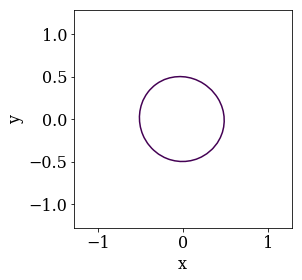

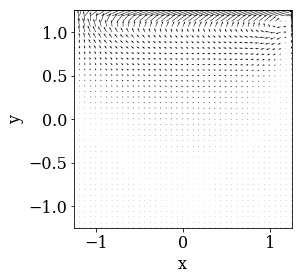

Level Set Advection Time:  0.08422613143920898
------------ Time = 0.8010000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6255349739887182e-13
Total poisson time : 0.00039887428283691406
Total INS time : 0.001230001449584961
Max, Min, U   : 2.0, -0.1601933541296619
Max, Min, V   : 0.3804516788327251, -0.3804516788327251
Max, Min, P   : 0.6192616255730004, -0.26719166499447455
Max, Min, DIV : 1.3877787807814457e-15, -1.3322676295501878e-15


Level Set Advection Time:  0.10656499862670898
------------ Time = 0.8020000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5032862353027856e-13
Total poisson time : 0.0007529258728027344
Total INS time : 0.003859996795654297
Max, Min, U   : 2.0, -0.16026694482310075
Max, Min, V   : 0.38057618078131095, -0.38057618078131095
Max, Min, P   : 0.6183249900976149, -0.26815009805425666
Max, Min, DIV : 1.2216790079566664e-15, -1.4918621893400541e-15


Level Set Advect

Level Set Advection Time:  0.08318877220153809
------------ Time = 0.8180000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4895033060378358e-13
Total poisson time : 0.0007228851318359375
Total INS time : 0.0031099319458007812
Max, Min, U   : 2.0, -0.16139577407270586
Max, Min, V   : 0.38252735616972117, -0.38252735616972117
Max, Min, P   : 0.6182929193012008, -0.2685520693083416
Max, Min, DIV : 1.1657341758564144e-15, -1.3569874390828573e-15


Level Set Advection Time:  0.0782010555267334
------------ Time = 0.8190000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4134973602688107e-13
Total poisson time : 0.0006918907165527344
Total INS time : 0.003962039947509766
Max, Min, U   : 2.0, -0.1614633030593067
Max, Min, V   : 0.3826467933513502, -0.3826467933513502
Max, Min, P   : 0.6074501810286828, -0.27941905474379686
Max, Min, DIV : 1.6653345369377348e-15, -1.1206313654810174e-15


Level Set Advectio

Level Set Advection Time:  0.08306503295898438
------------ Time = 0.8360000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.506178421031538e-13
Total poisson time : 0.0005130767822265625
Total INS time : 0.0037093162536621094
Max, Min, U   : 2.0, -0.16255745442263755
Max, Min, V   : 0.38463341999024575, -0.38463341999024575
Max, Min, P   : 0.6145960592532043, -0.27270445305074853
Max, Min, DIV : 1.4155343563970746e-15, -1.556046957951196e-15


Level Set Advection Time:  0.08188796043395996
------------ Time = 0.8370000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3865053427382797e-13
Total poisson time : 0.0008318424224853516
Total INS time : 0.003206014633178711
Max, Min, U   : 2.0, -0.16261866863842797
Max, Min, V   : 0.3847477483252034, -0.3847477483252034
Max, Min, P   : 0.6119680331778028, -0.2753589365619994
Max, Min, DIV : 1.6028844918025698e-15, -1.3530843112619095e-15


Level Set Advectio

Level Set Advection Time:  0.09989094734191895
------------ Time = 0.8540000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.44541931647154e-13
Total poisson time : 0.0028138160705566406
Total INS time : 0.006558895111083984
Max, Min, U   : 2.0, -0.16360643523203877
Max, Min, V   : 0.3866496483207834, -0.3866496483207834
Max, Min, P   : 0.6166941640557757, -0.27110007688571525
Max, Min, DIV : 1.1032841307212493e-15, -1.3877787807814457e-15


Level Set Advection Time:  0.08973217010498047
------------ Time = 0.8550000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5136117305545862e-13
Total poisson time : 0.0005712509155273438
Total INS time : 0.0044252872467041016
Max, Min, U   : 2.0, -0.16366144983084704
Max, Min, V   : 0.3867591152813526, -0.3867591152813526
Max, Min, P   : 0.6117356120106171, -0.2760871141131814
Max, Min, DIV : 1.3383391617161067e-15, -1.5543122344752192e-15


Level Set Advection 

Level Set Advection Time:  0.10451793670654297
------------ Time = 0.8710000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4094617760307777e-13
Total poisson time : 0.0006990432739257812
Total INS time : 0.004322052001953125
Max, Min, U   : 2.0, -0.16449558512643947
Max, Min, V   : 0.3884752915829645, -0.3884752915829645
Max, Min, P   : 0.6140250389738233, -0.27426775660244246
Max, Min, DIV : 1.5959455978986625e-15, -1.27675647831893e-15


Level Set Advection Time:  0.11548328399658203
------------ Time = 0.8720000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6328876151638488e-13
Total poisson time : 0.003459930419921875
Total INS time : 0.00687408447265625
Max, Min, U   : 2.0, -0.1645448573339958
Max, Min, V   : 0.3885803825914618, -0.3885803825914618
Max, Min, P   : 0.6303377814010019, -0.2579852629800887
Max, Min, DIV : 1.4502288259166107e-15, -1.4085954624931674e-15


Level Set Advection Time

Level Set Advection Time:  0.0954580307006836
------------ Time = 0.8890000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.76696424469908e-13
Total poisson time : 0.0010390281677246094
Total INS time : 0.005630970001220703
Max, Min, U   : 2.0, -0.1653316759007029
Max, Min, V   : 0.3903290591806051, -0.3903290591806051
Max, Min, P   : 0.6324135888531985, -0.25643853532083105
Max, Min, DIV : 1.3877787807814457e-15, -1.1102230246251565e-15


Level Set Advection Time:  0.09596896171569824
------------ Time = 0.8900000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.625082875034252e-13
Total poisson time : 0.0011279582977294922
Total INS time : 0.005719184875488281
Max, Min, U   : 2.0, -0.16537499390990004
Max, Min, V   : 0.39042973290468613, -0.39042973290468613
Max, Min, P   : 0.6019231993735816, -0.28696089559932775
Max, Min, DIV : 1.2073675392798577e-15, -1.304512053934559e-15


Level Set Advection Ti

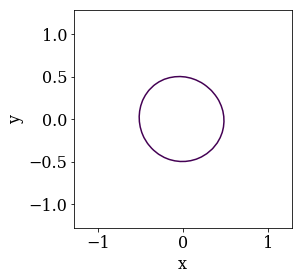

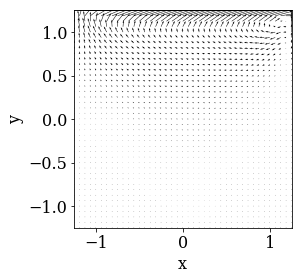

Level Set Advection Time:  0.10513615608215332
------------ Time = 0.9010000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3839919414411456e-13
Total poisson time : 0.0006210803985595703
Total INS time : 0.0018298625946044922
Max, Min, U   : 2.0, -0.16583069768349812
Max, Min, V   : 0.3915194842212791, -0.3915194842212791
Max, Min, P   : 0.621011172618172, -0.2683510623437546
Max, Min, DIV : 9.71445146547012e-16, -1.27675647831893e-15


Level Set Advection Time:  0.1059579849243164
------------ Time = 0.9020000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.468481575819282e-13
Total poisson time : 0.002833127975463867
Total INS time : 0.006913900375366211
Max, Min, U   : 2.0, -0.16587021194035403
Max, Min, V   : 0.3916170638243939, -0.3916170638243939
Max, Min, P   : 0.6231961780388284, -0.26620001316771524
Max, Min, DIV : 1.5543122344752192e-15, -1.3739009929736312e-15


Level Set Advection Time: 

Level Set Advection Time:  0.08557319641113281
------------ Time = 0.9190000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6498705388654527e-13
Total poisson time : 0.0006492137908935547
Total INS time : 0.003893136978149414
Max, Min, U   : 2.0, -0.16649307180573023
Max, Min, V   : 0.39324110345775704, -0.39324110345775704
Max, Min, P   : 0.6211702196374764, -0.26880425904680705
Max, Min, DIV : 1.6306400674181987e-15, -1.4641066137244252e-15


Level Set Advection Time:  0.08075809478759766
------------ Time = 0.9200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5235673741880415e-13
Total poisson time : 0.0006258487701416016
Total INS time : 0.003926992416381836
Max, Min, U   : 2.0, -0.1665268604390076
Max, Min, V   : 0.39333462659159263, -0.39333462659159263
Max, Min, P   : 0.620092678596827, -0.2699164291350387
Max, Min, DIV : 1.6930901125533637e-15, -1.6375789613221059e-15


Level Set Advecti

Level Set Advection Time:  0.11236715316772461
------------ Time = 0.9380000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5859824378012413e-13
Total poisson time : 0.0007040500640869141
Total INS time : 0.0037147998809814453
Max, Min, U   : 2.0, -0.16708181465905717
Max, Min, V   : 0.39498107541671557, -0.39498107541671557
Max, Min, P   : 0.6398781809631634, -0.2507678568755151
Max, Min, DIV : 1.4432899320127035e-15, -1.4432899320127035e-15


Level Set Advection Time:  0.1102447509765625
------------ Time = 0.9390000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4309537949687634e-13
Total poisson time : 0.0009400844573974609
Total INS time : 0.0041751861572265625
Max, Min, U   : 2.0, -0.16710971616596806
Max, Min, V   : 0.3950705269991916, -0.3950705269991916
Max, Min, P   : 0.6210021586365289, -0.2696799983321754
Max, Min, DIV : 1.5543122344752192e-15, -1.5334955527634975e-15


Level Set Advecti

Level Set Advection Time:  0.09915423393249512
------------ Time = 0.9560000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3644505116979604e-13
Total poisson time : 0.0010821819305419922
Total INS time : 0.004499197006225586
Max, Min, U   : 2.0, -0.1675376977630319
Max, Min, V   : 0.3965597238823649, -0.39789175074848154
Max, Min, P   : 0.6254321787908086, -0.2657520651791462
Max, Min, DIV : 1.1761425167122752e-15, -1.1171619185290638e-15


Level Set Advection Time:  0.08456778526306152
------------ Time = 0.9570000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8457507684526965e-13
Total poisson time : 0.0007681846618652344
Total INS time : 0.0040400028228759766
Max, Min, U   : 2.0, -0.16756017306521592
Max, Min, V   : 0.39664550271182003, -0.3980768736508303
Max, Min, P   : 0.6176007627126481, -0.2736096003089966
Max, Min, DIV : 1.3461454173580023e-15, -1.5265566588595902e-15


Level Set Advectio

Level Set Advection Time:  0.08402085304260254
------------ Time = 0.9750000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5043120676486918e-13
Total poisson time : 0.0005400180816650391
Total INS time : 0.003145933151245117
Max, Min, U   : 2.0, -0.16791440186770512
Max, Min, V   : 0.3981559774149422, -0.4013600218887052
Max, Min, P   : 0.636013191753889, -0.2562842001732482
Max, Min, DIV : 1.4155343563970746e-15, -1.5543122344752192e-15


Level Set Advection Time:  0.08001303672790527
------------ Time = 0.9760000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3050187796644875e-13
Total poisson time : 0.0007588863372802734
Total INS time : 0.0032749176025390625
Max, Min, U   : 2.0, -0.16793131444176618
Max, Min, V   : 0.3982380616908811, -0.40153972146226835
Max, Min, P   : 0.6253231116117514, -0.26700310161395263
Max, Min, DIV : 1.7074015812301724e-15, -1.5126788710517758e-15


Level Set Advectio

Level Set Advection Time:  0.10245895385742188
------------ Time = 0.9930000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.670283099746718e-13
Total poisson time : 0.0007998943328857422
Total INS time : 0.0041620731353759766
Max, Min, U   : 2.0, -0.16817512004550575
Max, Min, V   : 0.39960492312110313, -0.40455197538141846
Max, Min, P   : 0.6310563182048903, -0.26176890864375796
Max, Min, DIV : 1.3747683547116196e-15, -1.4849232954361469e-15


Level Set Advection Time:  0.10106277465820312
------------ Time = 0.9940000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.438111198599911e-13
Total poisson time : 0.0016582012176513672
Total INS time : 0.005669832229614258
Max, Min, U   : 2.0, -0.16818691749875594
Max, Min, V   : 0.399683673439866, -0.40472668282141566
Max, Min, P   : 0.6266397374986111, -0.26621535887443504
Max, Min, DIV : 1.609823385706477e-15, -1.5543122344752192e-15


Level Set Advectio

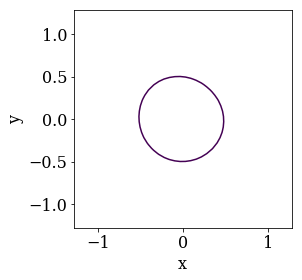

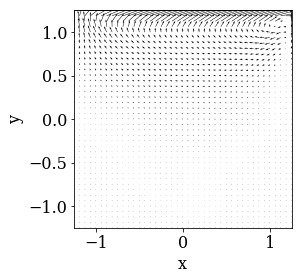

Level Set Advection Time:  0.0900578498840332
------------ Time = 1.0010000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4816966293448441e-13
Total poisson time : 0.000392913818359375
Total INS time : 0.0012040138244628906
Max, Min, U   : 2.0, -0.16826169575855865
Max, Min, V   : 0.4002298919582506, -0.4059420051510058
Max, Min, P   : 0.6182326341679614, -0.2748330871233399
Max, Min, DIV : 1.0998146837692957e-15, -1.2880321809127793e-15


Level Set Advection Time:  0.08923983573913574
------------ Time = 1.0020000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4904388956504058e-13
Total poisson time : 0.0010728836059570312
Total INS time : 0.004068136215209961
Max, Min, U   : 2.0, -0.16827126924132182
Max, Min, V   : 0.4003072096146676, -0.4061145376630809
Max, Min, P   : 0.6304572686697822, -0.2626387583194193
Max, Min, DIV : 1.4432899320127035e-15, -1.6375789613221059e-15


Level Set Advection T

Level Set Advection Time:  0.09526181221008301
------------ Time = 1.0189999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.334067020438535e-13
Total poisson time : 0.0007250308990478516
Total INS time : 0.004143714904785156
Max, Min, U   : 2.0, -0.16898805504249828
Max, Min, V   : 0.40159489358172606, -0.40900661691724605
Max, Min, P   : 0.6363092676140476, -0.25730989008803046
Max, Min, DIV : 1.1043683328937348e-15, -1.190887666258078e-15


Level Set Advection Time:  0.09564495086669922
------------ Time = 1.0199999999999985 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4356342086197946e-13
Total poisson time : 0.0016870498657226562
Total INS time : 0.004874229431152344
Max, Min, U   : 2.0, -0.16906872590450245
Max, Min, V   : 0.4016690934791942, -0.40917435233788296
Max, Min, P   : 0.62858635505029, -0.2650640267371277
Max, Min, DIV : 1.388646142519434e-15, -1.2351231148954867e-15


Level Set Advection T

Level Set Advection Time:  0.08520078659057617
------------ Time = 1.0369999999999966 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.711389396278854e-13
Total poisson time : 0.0007050037384033203
Total INS time : 0.003926753997802734
Max, Min, U   : 2.0, -0.17040254073584102
Max, Min, V   : 0.4029049781517226, -0.41198599810354086
Max, Min, P   : 0.6443333292805271, -0.24985502249120248
Max, Min, DIV : 1.4667086989383904e-15, -1.4710455076283324e-15


Level Set Advection Time:  0.0811150074005127
------------ Time = 1.0379999999999965 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5027036406336526e-13
Total poisson time : 0.0005791187286376953
Total INS time : 0.003950834274291992
Max, Min, U   : 2.0, -0.17047878716933765
Max, Min, V   : 0.402976200456915, -0.4121490672562081
Max, Min, P   : 0.631396647393067, -0.26282374790826546
Max, Min, DIV : 1.3600232051658168e-15, -1.5759962779249292e-15


Level Set Advection T

Level Set Advection Time:  0.1124417781829834
------------ Time = 1.0559999999999945 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.442050586919056e-13
Total poisson time : 0.0006432533264160156
Total INS time : 0.003706216812133789
Max, Min, U   : 2.0, -0.1718091236558764
Max, Min, V   : 0.40423098138583896, -0.41504100459769805
Max, Min, P   : 0.6381290664651488, -0.256670508615195
Max, Min, DIV : 1.3322676295501878e-15, -9.922618282587337e-16


Level Set Advection Time:  0.1095890998840332
------------ Time = 1.0569999999999944 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.829811558335606e-13
Total poisson time : 0.0016789436340332031
Total INS time : 0.006046295166015625
Max, Min, U   : 2.0, -0.17188069177419404
Max, Min, V   : 0.4042992043221948, -0.4151992862432666
Max, Min, P   : 0.6483525272619144, -0.24648217940439818
Max, Min, DIV : 1.3322676295501878e-15, -1.654926196081874e-15


Level Set Advection Time:

Level Set Advection Time:  0.09967207908630371
------------ Time = 1.0729999999999926 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4727506812543793e-13
Total poisson time : 0.0007338523864746094
Total INS time : 0.0029098987579345703
Max, Min, U   : 2.0, -0.17299227859831173
Max, Min, V   : 0.40537010066713985, -0.4176983098966165
Max, Min, P   : 0.6232789847820918, -0.2720845171477039
Max, Min, DIV : 1.582067810090848e-15, -1.3739009929736312e-15


Level Set Advection Time:  0.10246825218200684
------------ Time = 1.0739999999999925 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2997713666643005e-13
Total poisson time : 0.0012111663818359375
Total INS time : 0.004581928253173828
Max, Min, U   : 2.0, -0.17305965944969878
Max, Min, V   : 0.40543575900436324, -0.4178524253913074
Max, Min, P   : 0.635802631287286, -0.25959424457839786
Max, Min, DIV : 1.3739009929736312e-15, -1.1102230246251565e-15


Level Set Advectio

Level Set Advection Time:  0.09485483169555664
------------ Time = 1.0909999999999906 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6467751158594794e-13
Total poisson time : 0.0013167858123779297
Total INS time : 0.005857944488525391
Max, Min, U   : 2.0, -0.17416748716512062
Max, Min, V   : 0.40652968091837416, -0.4204357115323691
Max, Min, P   : 0.6464572914002088, -0.24951201156396274
Max, Min, DIV : 1.734723475976807e-15, -1.1796119636642288e-15


Level Set Advection Time:  0.08685493469238281
------------ Time = 1.0919999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7021275529162237e-13
Total poisson time : 0.0008587837219238281
Total INS time : 0.004985809326171875
Max, Min, U   : 2.0, -0.1742304405312973
Max, Min, V   : 0.40659273978255556, -0.4205855330673386
Max, Min, P   : 0.644083295019912, -0.2519199665957851
Max, Min, DIV : 1.2051991349348867e-15, -1.1171619185290638e-15


Level Set Advection 

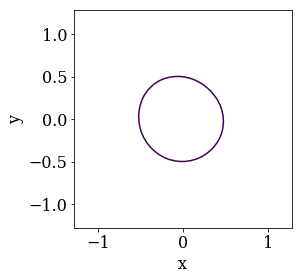

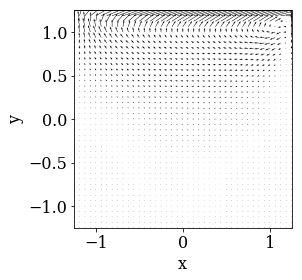

Level Set Advection Time:  0.08385992050170898
------------ Time = 1.1009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3367998850718997e-13
Total poisson time : 0.00039386749267578125
Total INS time : 0.0011591911315917969
Max, Min, U   : 2.0, -0.17478597006832727
Max, Min, V   : 0.40715396493203976, -0.42192339230689424
Max, Min, P   : 0.638584272546053, -0.2577259676412723
Max, Min, DIV : 1.1934897514720433e-15, -1.4432899320127035e-15


Level Set Advection Time:  0.10464715957641602
------------ Time = 1.1019999999999894 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.362610308845635e-13
Total poisson time : 0.0016238689422607422
Total INS time : 0.005609035491943359
Max, Min, U   : 2.0, -0.17484646848705263
Max, Min, V   : 0.4072156291024094, -0.4220708794473433
Max, Min, P   : 0.637938034552555, -0.2584064608369756
Max, Min, DIV : 1.4988010832439613e-15, -1.4710455076283324e-15


Level Set Advection

Level Set Advection Time:  0.08855009078979492
------------ Time = 1.1189999999999876 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2502612183279105e-13
Total poisson time : 0.0007078647613525391
Total INS time : 0.0040798187255859375
Max, Min, U   : 2.0, -0.17583827428581897
Max, Min, V   : 0.4082433794965098, -0.4245443472840914
Max, Min, P   : 0.6417679521126791, -0.2542684186324259
Max, Min, DIV : 1.1102230246251565e-15, -9.645062526431047e-16


Level Set Advection Time:  0.07997798919677734
------------ Time = 1.1199999999999875 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.366537711574414e-13
Total poisson time : 0.0005769729614257812
Total INS time : 0.003840923309326172
Max, Min, U   : 2.0, -0.1758947014075424
Max, Min, V   : 0.40830260705715343, -0.42468817895737104
Max, Min, P   : 0.6310117499725696, -0.265021566687177
Max, Min, DIV : 1.4224732503009818e-15, -1.396127137509584e-15


Level Set Advection Ti

Level Set Advection Time:  0.10292196273803711
------------ Time = 1.1369999999999856 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7432072486917965e-13
Total poisson time : 0.0012660026550292969
Total INS time : 0.005010843276977539
Max, Min, U   : 2.0, -0.17681571592334822
Max, Min, V   : 0.40928950628401384, -0.42710027961979496
Max, Min, P   : 0.654274028687036, -0.24221200398127823
Max, Min, DIV : 1.27675647831893e-15, -1.3548190347378863e-15


Level Set Advection Time:  0.10937809944152832
------------ Time = 1.1379999999999855 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7945087242551627e-13
Total poisson time : 0.0009810924530029297
Total INS time : 0.004322052001953125
Max, Min, U   : 2.0, -0.17686771483918187
Max, Min, V   : 0.4093464372066378, -0.42724019436481736
Max, Min, P   : 0.6514854241286029, -0.24503269980218628
Max, Min, DIV : 1.4432899320127035e-15, -1.031726787337206e-15


Level Set Advection

Level Set Advection Time:  0.10137391090393066
------------ Time = 1.1539999999999837 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2864471722042235e-13
Total poisson time : 0.0025141239166259766
Total INS time : 0.005706071853637695
Max, Min, U   : 2.0, -0.17766701202441554
Max, Min, V   : 0.41024093714371557, -0.429449382886933
Max, Min, P   : 0.636543592533437, -0.2604904544756202
Max, Min, DIV : 1.0148132334464322e-15, -1.5846698953048133e-15


Level Set Advection Time:  0.09689807891845703
------------ Time = 1.1549999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4406313649332982e-13
Total poisson time : 0.0011439323425292969
Total INS time : 0.0041599273681640625
Max, Min, U   : 2.0, -0.17771493044812714
Max, Min, V   : 0.41029583295505895, -0.4295856341318395
Max, Min, P   : 0.6301604453720849, -0.2669059921864466
Max, Min, DIV : 1.4179196011765427e-15, -1.3340023530261647e-15


Level Set Advection

Level Set Advection Time:  0.1079401969909668
------------ Time = 1.1719999999999817 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3897415523029046e-13
Total poisson time : 0.0011739730834960938
Total INS time : 0.0046539306640625
Max, Min, U   : 2.0, -0.17849338020762887
Max, Min, V   : 0.41121063635026095, -0.4318701627105943
Max, Min, P   : 0.6522996360992297, -0.2451368937401067
Max, Min, DIV : 1.1657341758564144e-15, -1.0182826803983858e-15


Level Set Advection Time:  0.09007406234741211
------------ Time = 1.1729999999999816 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.439439025267995e-13
Total poisson time : 0.0015060901641845703
Total INS time : 0.006745100021362305
Max, Min, U   : 2.0, -0.17853709686373578
Max, Min, V   : 0.4112632807889944, -0.43200276462280063
Max, Min, P   : 0.6408365251351709, -0.2566320522758084
Max, Min, DIV : 1.706751059926681e-15, -1.3877787807814457e-15


Level Set Advection Tim

Level Set Advection Time:  0.09260725975036621
------------ Time = 1.1889999999999799 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2980180893995426e-13
Total poisson time : 0.0012252330780029297
Total INS time : 0.006819009780883789
Max, Min, U   : 2.0, -0.1792048065435251
Max, Min, V   : 0.41209040693806903, -0.43409634193841584
Max, Min, P   : 0.6488411315779998, -0.24939500442117524
Max, Min, DIV : 1.4016565685892601e-15, -1.493596912816031e-15


Level Set Advection Time:  0.14769291877746582
------------ Time = 1.1899999999999797 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3122405422443891e-13
Total poisson time : 0.0010561943054199219
Total INS time : 0.004334211349487305
Max, Min, U   : 2.0, -0.17924461721887028
Max, Min, V   : 0.4121411473582058, -0.4342254213698254
Max, Min, P   : 0.6539095584336468, -0.24434619415918857
Max, Min, DIV : 1.5543122344752192e-15, -1.6653345369377348e-15


Level Set Advectio

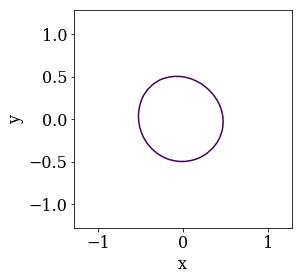

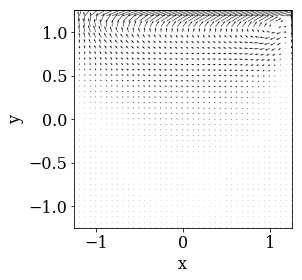

Level Set Advection Time:  0.0933380126953125
------------ Time = 1.2009999999999785 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1755459191120076e-13
Total poisson time : 0.0007622241973876953
Total INS time : 0.0026602745056152344
Max, Min, U   : 2.0, -0.17966689678804149
Max, Min, V   : 0.41269234395680865, -0.4356321716148539
Max, Min, P   : 0.6484222674213027, -0.2501756923667864
Max, Min, DIV : 1.3600232051658168e-15, -8.881784197001252e-16


Level Set Advection Time:  0.10311007499694824
------------ Time = 1.2019999999999784 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2708579289668064e-13
Total poisson time : 0.0023200511932373047
Total INS time : 0.006307840347290039
Max, Min, U   : 2.0, -0.17970388624990064
Max, Min, V   : 0.41274182104692164, -0.43575886406239506
Max, Min, P   : 0.6421174579543751, -0.25651332200833643
Max, Min, DIV : 1.4988010832439613e-15, -1.4736475928422976e-15


Level Set Advecti

Level Set Advection Time:  0.10365486145019531
------------ Time = 1.2179999999999767 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.55598705256116e-13
Total poisson time : 0.0008139610290527344
Total INS time : 0.005385398864746094
Max, Min, U   : 2.0, -0.18026424919730627
Max, Min, V   : 0.4135194044917159, -0.4377592398080364
Max, Min, P   : 0.6317178680750725, -0.26745099137919537
Max, Min, DIV : 1.4667086989383904e-15, -1.4432899320127035e-15


Level Set Advection Time:  0.09971928596496582
------------ Time = 1.2189999999999765 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.311410473086312e-13
Total poisson time : 0.0015528202056884766
Total INS time : 0.004339933395385742
Max, Min, U   : 2.0, -0.18029731555901693
Max, Min, V   : 0.4135671356975095, -0.43788260819139724
Max, Min, P   : 0.6411047366912338, -0.25810191999801685
Max, Min, DIV : 1.2912847874302358e-15, -1.3600232051658168e-15


Level Set Advection 

Level Set Advection Time:  0.10486388206481934
------------ Time = 1.2359999999999747 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2749438900512028e-13
Total poisson time : 0.001882791519165039
Total INS time : 0.0053272247314453125
Max, Min, U   : 2.0, -0.1808244617432888
Max, Min, V   : 0.4143633684417994, -0.43995065934254646
Max, Min, P   : 0.652127525087636, -0.24772628388070211
Max, Min, DIV : 1.3600232051658168e-15, -1.2836953722228372e-15


Level Set Advection Time:  0.09233999252319336
------------ Time = 1.2369999999999746 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4555136308397876e-13
Total poisson time : 0.002112865447998047
Total INS time : 0.008101701736450195
Max, Min, U   : 2.0, -0.18085342278635672
Max, Min, V   : 0.41440932397082697, -0.44007060796327974
Max, Min, P   : 0.6433495086294573, -0.25654246344793474
Max, Min, DIV : 1.3394233638885922e-15, -1.4710455076283324e-15


Level Set Advectio

Level Set Advection Time:  0.10521602630615234
------------ Time = 1.2539999999999727 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.259972747429919e-13
Total poisson time : 0.0014691352844238281
Total INS time : 0.004130125045776367
Max, Min, U   : 2.0, -0.181311281789418
Max, Min, V   : 0.4151759557982849, -0.4420813294232601
Max, Min, P   : 0.6472309886899125, -0.25331104577229924
Max, Min, DIV : 1.4432899320127035e-15, -1.5126788710517758e-15


Level Set Advection Time:  0.09349608421325684
------------ Time = 1.2549999999999726 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3362792762740898e-13
Total poisson time : 0.0010180473327636719
Total INS time : 0.0040531158447265625
Max, Min, U   : 2.0, -0.1813361973494335
Max, Min, V   : 0.4152202040127188, -0.44219795258589295
Max, Min, P   : 0.6547636613292644, -0.24581668136389156
Max, Min, DIV : 1.654926196081874e-15, -1.695692197767329e-15


Level Set Advection Ti

Level Set Advection Time:  0.11172604560852051
------------ Time = 1.2709999999999708 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.45170001911764e-13
Total poisson time : 0.0014274120330810547
Total INS time : 0.006430149078369141
Max, Min, U   : 2.0, -0.18171553303813603
Max, Min, V   : 0.4159132108960472, -0.4440346021730731
Max, Min, P   : 0.6535843520260869, -0.2458180970839549
Max, Min, DIV : 1.2212453270876722e-15, -1.0547118733938987e-15


Level Set Advection Time:  0.10021615028381348
------------ Time = 1.2719999999999707 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6238891799665107e-13
Total poisson time : 0.0015311241149902344
Total INS time : 0.0069239139556884766
Max, Min, U   : 2.0, -0.18173783877693267
Max, Min, V   : 0.415955687840945, -0.4441476421559986
Max, Min, P   : 0.6314573772459593, -0.26798057833858707
Max, Min, DIV : 1.3322676295501878e-15, -1.3322676295501878e-15


Level Set Advection T

Level Set Advection Time:  0.09503483772277832
------------ Time = 1.2899999999999687 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2094695511238474e-13
Total poisson time : 0.0011191368103027344
Total INS time : 0.0036139488220214844
Max, Min, U   : 2.0, -0.182101798200009
Max, Min, V   : 0.41670467295395425, -0.44615284956550777
Max, Min, P   : 0.6536097715886332, -0.246288239795929
Max, Min, DIV : 1.3322676295501878e-15, -1.5543122344752192e-15


Level Set Advection Time:  0.09742093086242676
------------ Time = 1.2909999999999686 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4677708740065915e-13
Total poisson time : 0.0011608600616455078
Total INS time : 0.0035610198974609375
Max, Min, U   : 2.0, -0.1821199710933482
Max, Min, V   : 0.4167454435243635, -0.4462625885507606
Max, Min, P   : 0.6511276508972057, -0.2488013509677964
Max, Min, DIV : 1.5126788710517758e-15, -1.4623718902484484e-15


Level Set Advection 

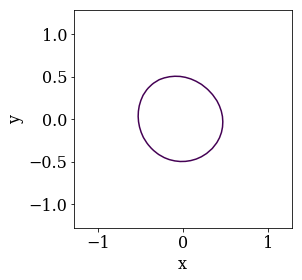

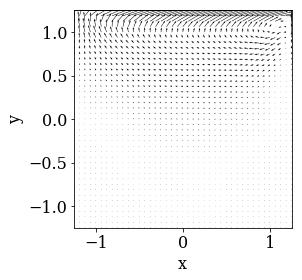

Level Set Advection Time:  0.09687304496765137
------------ Time = 1.3009999999999675 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2488674535368111e-13
Total poisson time : 0.00045013427734375
Total INS time : 0.0012989044189453125
Max, Min, U   : 2.0, -0.18228996833661892
Max, Min, V   : 0.41714842209988723, -0.44735049160588186
Max, Min, P   : 0.6412713780188203, -0.25872098927297105
Max, Min, DIV : 1.457167719820518e-15, -1.2004286453759505e-15


Level Set Advection Time:  0.09567689895629883
------------ Time = 1.3019999999999674 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3126765025308535e-13
Total poisson time : 0.0009441375732421875
Total INS time : 0.003983974456787109
Max, Min, U   : 2.0, -0.1823058033513446
Max, Min, V   : 0.4171882498388972, -0.4474583374124442
Max, Min, P   : 0.6616872951406213, -0.23834131466029282
Max, Min, DIV : 1.2212453270876722e-15, -1.3739009929736312e-15


Level Set Advection

Level Set Advection Time:  0.10679292678833008
------------ Time = 1.3189999999999655 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4244030063072814e-13
Total poisson time : 0.0007150173187255859
Total INS time : 0.0034639835357666016
Max, Min, U   : 2.0, -0.18254297528794736
Max, Min, V   : 0.4178524886917467, -0.44926582482445565
Max, Min, P   : 0.6558462897737642, -0.24479395835752898
Max, Min, DIV : 9.788177213199134e-16, -1.4953316362920077e-15


Level Set Advection Time:  0.10616207122802734
------------ Time = 1.3199999999999654 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1010716050314521e-13
Total poisson time : 0.0008420944213867188
Total INS time : 0.006410121917724609
Max, Min, U   : 2.0, -0.18255505689144647
Max, Min, V   : 0.4178908168781578, -0.4493706403918265
Max, Min, P   : 0.6532721534333289, -0.24740403898805205
Max, Min, DIV : 1.4432899320127035e-15, -1.1379786002407855e-15


Level Set Advecti

Level Set Advection Time:  0.0947868824005127
------------ Time = 1.3359999999999637 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3585131788345288e-13
Total poisson time : 0.000997304916381836
Total INS time : 0.005481243133544922
Max, Min, U   : 2.0, -0.18272049390372172
Max, Min, V   : 0.418493086011317, -0.4510253328683248
Max, Min, P   : 0.6597266278222171, -0.24152398129791322
Max, Min, DIV : 1.7034984534092246e-15, -1.384309333829492e-15


Level Set Advection Time:  0.09715700149536133
------------ Time = 1.3369999999999636 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2484286236547376e-13
Total poisson time : 0.002185821533203125
Total INS time : 0.0056688785552978516
Max, Min, U   : 2.0, -0.18272910479720017
Max, Min, V   : 0.41853005030342716, -0.4511273674752527
Max, Min, P   : 0.6513077106616084, -0.2499787507455199
Max, Min, DIV : 1.2299189444675562e-15, -1.2420620087993939e-15


Level Set Advection Ti

Level Set Advection Time:  0.0847017765045166
------------ Time = 1.3549999999999616 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3700195211837298e-13
Total poisson time : 0.0008242130279541016
Total INS time : 0.003653287887573242
Max, Min, U   : 2.0, -0.18284886793570004
Max, Min, V   : 0.41918060932199686, -0.45293595578134893
Max, Min, P   : 0.6389333655168756, -0.26288136304783566
Max, Min, DIV : 1.4988010832439613e-15, -1.4988010832439613e-15


Level Set Advection Time:  0.08054184913635254
------------ Time = 1.3559999999999615 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.331121305901572e-13
Total poisson time : 0.0006930828094482422
Total INS time : 0.003767251968383789
Max, Min, U   : 2.0, -0.18285351753526638
Max, Min, V   : 0.41921581724257084, -0.4530348360661496
Max, Min, P   : 0.6593316445671152, -0.24251552408981664
Max, Min, DIV : 1.609823385706477e-15, -1.407728100755179e-15


Level Set Advection

Level Set Advection Time:  0.10341906547546387
------------ Time = 1.3729999999999596 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6945647354786497e-13
Total poisson time : 0.0006389617919921875
Total INS time : 0.004828929901123047
Max, Min, U   : 2.0, -0.18289988444503857
Max, Min, V   : 0.41978448073557567, -0.4546862854798788
Max, Min, P   : 0.6747493205063098, -0.2277019514875568
Max, Min, DIV : 1.4155343563970746e-15, -1.3765030781875964e-15


Level Set Advection Time:  0.09538412094116211
------------ Time = 1.3739999999999595 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2797498140435267e-13
Total poisson time : 0.0011088848114013672
Total INS time : 0.0035681724548339844
Max, Min, U   : 2.0, -0.18290076955412912
Max, Min, V   : 0.4198165912514949, -0.4547819332208433
Max, Min, P   : 0.6540404214963799, -0.24844315796788063
Max, Min, DIV : 1.5543122344752192e-15, -1.1657341758564144e-15


Level Set Advecti

Level Set Advection Time:  0.10640621185302734
------------ Time = 1.3899999999999577 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5416310278608526e-13
Total poisson time : 0.001157999038696289
Total INS time : 0.004008054733276367
Max, Min, U   : 2.0, -0.18288927325526386
Max, Min, V   : 0.4203209901806996, -0.4562914029670102
Max, Min, P   : 0.6726995761552101, -0.23030163160710937
Max, Min, DIV : 1.4988010832439613e-15, -1.2906342661267445e-15


Level Set Advection Time:  0.09041190147399902
------------ Time = 1.3909999999999576 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4510943014656224e-13
Total poisson time : 0.0013172626495361328
Total INS time : 0.004911184310913086
Max, Min, U   : 2.0, -0.18288696462093887
Max, Min, V   : 0.4203519367735139, -0.4563844517239914
Max, Min, P   : 0.6647666419330227, -0.2382668355827909
Max, Min, DIV : 1.6653345369377348e-15, -1.7486012637846216e-15


Level Set Advection 

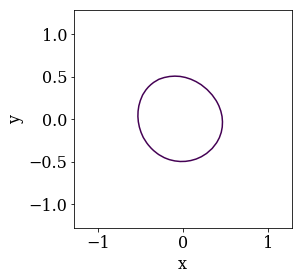

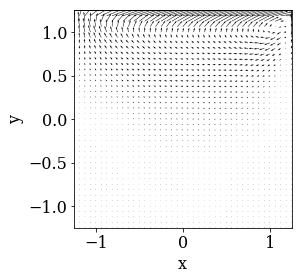

Level Set Advection Time:  0.09512710571289062
------------ Time = 1.4009999999999565 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2891305740372934e-13
Total poisson time : 0.0005362033843994141
Total INS time : 0.001687765121459961
Max, Min, U   : 2.0, -0.18285372126609253
Max, Min, V   : 0.4206577293009395, -0.45730669406498065
Max, Min, P   : 0.6471859791923511, -0.25616959060418687
Max, Min, DIV : 1.3287981825982342e-15, -1.6375789613221059e-15


Level Set Advection Time:  0.10459518432617188
------------ Time = 1.4019999999999564 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9443535420250993e-13
Total poisson time : 0.0011222362518310547
Total INS time : 0.005866050720214844
Max, Min, U   : 2.0, -0.18284938712834378
Max, Min, V   : 0.42068794420939054, -0.4573980991048537
Max, Min, P   : 0.6801062447055181, -0.22328147094148051
Max, Min, DIV : 1.429412144204889e-15, -1.1553258350005535e-15


Level Set Advecti

Level Set Advection Time:  0.10881209373474121
------------ Time = 1.4189999999999545 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2072752374961133e-13
Total poisson time : 0.0010991096496582031
Total INS time : 0.004283905029296875
Max, Min, U   : 2.0, -0.1834243528546444
Max, Min, V   : 0.4211978966317418, -0.4589313937277791
Max, Min, P   : 0.6596637586770631, -0.24643832846241318
Max, Min, DIV : 1.4493614641786223e-15, -1.1553258350005535e-15


Level Set Advection Time:  0.10367703437805176
------------ Time = 1.4199999999999544 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3003058519056218e-13
Total poisson time : 0.001287221908569336
Total INS time : 0.005872964859008789
Max, Min, U   : 2.0, -0.18347901108820214
Max, Min, V   : 0.421228855847354, -0.45902062583141173
Max, Min, P   : 0.6628202652435106, -0.24345749128997649
Max, Min, DIV : 1.5543122344752192e-15, -1.3877787807814457e-15


Level Set Advection 

Level Set Advection Time:  0.09773612022399902
------------ Time = 1.4359999999999526 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3446178656811547e-13
Total poisson time : 0.0012900829315185547
Total INS time : 0.0049419403076171875
Max, Min, U   : 2.0, -0.18442496267662448
Max, Min, V   : 0.421717333613452, -0.46042658145259235
Max, Min, P   : 0.671412481044815, -0.2358035675996044
Max, Min, DIV : 1.4432899320127035e-15, -1.3322676295501878e-15


Level Set Advection Time:  0.10482215881347656
------------ Time = 1.4369999999999525 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.367450927408032e-13
Total poisson time : 0.0013458728790283203
Total INS time : 0.00528717041015625
Max, Min, U   : 2.0, -0.1844848407687152
Max, Min, V   : 0.4217472075392484, -0.4605133399273928
Max, Min, P   : 0.6596863210760793, -0.2475734045800763
Max, Min, DIV : 1.474514954580286e-15, -1.6653345369377348e-15


Level Set Advection Time

Level Set Advection Time:  0.12245368957519531
------------ Time = 1.4529999999999508 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5959942795307436e-13
Total poisson time : 0.0010859966278076172
Total INS time : 0.004211902618408203
Max, Min, U   : 2.0, -0.1854208172706351
Max, Min, V   : 0.42221625929228324, -0.4618831593371072
Max, Min, P   : 0.6508985958056531, -0.2570599934176241
Max, Min, DIV : 1.6653345369377348e-15, -1.4432899320127035e-15


Level Set Advection Time:  0.10931682586669922
------------ Time = 1.4539999999999507 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4973733747442864e-13
Total poisson time : 0.0021619796752929688
Total INS time : 0.00966024398803711
Max, Min, U   : 2.0, -0.18547793719313826
Max, Min, V   : 0.42224502458576657, -0.46196763749189496
Max, Min, P   : 0.6526724509372763, -0.2553298152386657
Max, Min, DIV : 1.5386997231914279e-15, -1.2490009027033011e-15


Level Set Advection

Level Set Advection Time:  0.10097002983093262
------------ Time = 1.469999999999949 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6667870921542577e-13
Total poisson time : 0.0009930133819580078
Total INS time : 0.003283977508544922
Max, Min, U   : 2.0, -0.1863698320134226
Max, Min, V   : 0.422696683673553, -0.4633013875361706
Max, Min, P   : 0.6773404888280232, -0.23136046223414183
Max, Min, DIV : 1.4500119854821136e-15, -1.6826817716975029e-15


Level Set Advection Time:  0.10001897811889648
------------ Time = 1.4709999999999488 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2219168403659154e-13
Total poisson time : 0.000926971435546875
Total INS time : 0.003331899642944336
Max, Min, U   : 2.0, -0.18642420029288687
Max, Min, V   : 0.42272438312071653, -0.4633836372359931
Max, Min, P   : 0.6702696052723858, -0.23847500063840818
Max, Min, DIV : 1.4779844015322396e-15, -1.457167719820518e-15


Level Set Advection Ti

Level Set Advection Time:  0.09551310539245605
------------ Time = 1.4889999999999468 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2283093872857993e-13
Total poisson time : 0.0010759830474853516
Total INS time : 0.004285097122192383
Max, Min, U   : 2.0, -0.18737522533405193
Max, Min, V   : 0.4232126059795894, -0.4648421611673809
Max, Min, P   : 0.6691732390197935, -0.24035674677374788
Max, Min, DIV : 1.5543122344752192e-15, -1.5300261058115439e-15


Level Set Advection Time:  0.09426498413085938
------------ Time = 1.4899999999999467 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1640527158331998e-13
Total poisson time : 0.0012021064758300781
Total INS time : 0.004007101058959961
Max, Min, U   : 2.0, -0.18742652867843634
Max, Min, V   : 0.4232391621685139, -0.46492198081879466
Max, Min, P   : 0.6689316039033779, -0.24064198686688143
Max, Min, DIV : 1.5265566588595902e-15, -1.2490009027033011e-15


Level Set Advecti

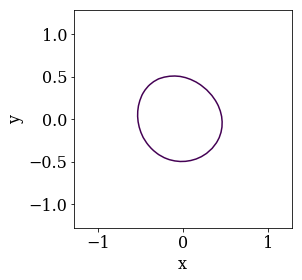

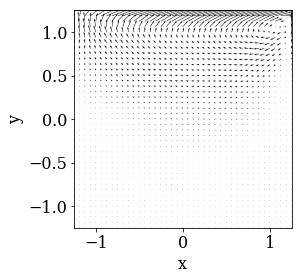

Level Set Advection Time:  0.09743714332580566
------------ Time = 1.5009999999999455 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.381164322714937e-13
Total poisson time : 0.0004279613494873047
Total INS time : 0.0012378692626953125
Max, Min, U   : 2.0, -0.18798025122353715
Max, Min, V   : 0.4235274271039883, -0.46579170970426975
Max, Min, P   : 0.6698982912324991, -0.2401547172846184
Max, Min, DIV : 1.5543122344752192e-15, -1.5612511283791264e-15


Level Set Advection Time:  0.0928339958190918
------------ Time = 1.5019999999999454 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.274901583586588e-13
Total poisson time : 0.0022630691528320312
Total INS time : 0.006262063980102539
Max, Min, U   : 2.0, -0.1880296257664516
Max, Min, V   : 0.4235532861149119, -0.4658700270852072
Max, Min, P   : 0.6686753507780036, -0.24142121774776237
Max, Min, DIV : 1.1275702593849246e-15, -1.5629858518551032e-15


Level Set Advection T

Level Set Advection Time:  0.08804821968078613
------------ Time = 1.5199999999999434 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2770547913941018e-13
Total poisson time : 0.0010349750518798828
Total INS time : 0.005328178405761719
Max, Min, U   : 2.0, -0.18889097231210603
Max, Min, V   : 0.42400908014473127, -0.46725869104364925
Max, Min, P   : 0.6769793010949491, -0.23390055624344214
Max, Min, DIV : 1.5508427875232655e-15, -1.0685896612017132e-15


Level Set Advection Time:  0.08957219123840332
------------ Time = 1.5209999999999433 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6267152935635278e-13
Total poisson time : 0.001027822494506836
Total INS time : 0.004210948944091797
Max, Min, U   : 2.0, -0.18893730591362407
Max, Min, V   : 0.4240338728216629, -0.46733468046974747
Max, Min, P   : 0.6498671568272276, -0.2610561679784114
Max, Min, DIV : 1.3322676295501878e-15, -1.304512053934559e-15


Level Set Advectio

Level Set Advection Time:  0.09725713729858398
------------ Time = 1.5379999999999414 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3070631517878756e-13
Total poisson time : 0.0011680126190185547
Total INS time : 0.005113840103149414
Max, Min, U   : 2.0, -0.18970060610201564
Max, Min, V   : 0.42444704854109216, -0.46860815198211747
Max, Min, P   : 0.658627638260908, -0.2530336891853723
Max, Min, DIV : 1.321859288694327e-15, -1.536964999715451e-15


Level Set Advection Time:  0.09460711479187012
------------ Time = 1.5389999999999413 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3447587995345878e-13
Total poisson time : 0.0016319751739501953
Total INS time : 0.004957914352416992
Max, Min, U   : 2.0, -0.18974407547505462
Max, Min, V   : 0.42447087160507874, -0.468681992386309
Max, Min, P   : 0.6555198091558576, -0.256176625517557
Max, Min, DIV : 1.5543122344752192e-15, -1.5543122344752192e-15


Level Set Advection Ti

Level Set Advection Time:  0.0990908145904541
------------ Time = 1.5549999999999395 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3165552145167213e-13
Total poisson time : 0.0027370452880859375
Total INS time : 0.0077707767486572266
Max, Min, U   : 2.0, -0.19041802740336083
Max, Min, V   : 0.42484496369857805, -0.46984755908150583
Max, Min, P   : 0.663919824282361, -0.2481263317692692
Max, Min, DIV : 1.5681900222830336e-15, -1.609823385706477e-15


Level Set Advection Time:  0.09592390060424805
------------ Time = 1.5559999999999394 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.81781966786597e-13
Total poisson time : 0.002145051956176758
Total INS time : 0.0048177242279052734
Max, Min, U   : 2.0, -0.19045880490877345
Max, Min, V   : 0.4248679080617172, -0.4699194231368184
Max, Min, P   : 0.6924937807866356, -0.21957250675069778
Max, Min, DIV : 1.5439038936193583e-15, -1.4918621893400541e-15


Level Set Advection T

Level Set Advection Time:  0.09502196311950684
------------ Time = 1.5729999999999376 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4529200249226482e-13
Total poisson time : 0.0007050037384033203
Total INS time : 0.0033431053161621094
Max, Min, U   : 2.0, -0.19112792972180467
Max, Min, V   : 0.4252502999328878, -0.4711236870133763
Max, Min, P   : 0.6675541069012488, -0.24484991513280766
Max, Min, DIV : 1.2212453270876722e-15, -1.1102230246251565e-15


Level Set Advection Time:  0.09306788444519043
------------ Time = 1.5739999999999374 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.44499385830017e-13
Total poisson time : 0.0033121109008789062
Total INS time : 0.0066187381744384766
Max, Min, U   : 2.0, -0.19116587649667877
Max, Min, V   : 0.4252723490386937, -0.47119351031024703
Max, Min, P   : 0.6672647889716342, -0.24515883375730316
Max, Min, DIV : 1.429412144204889e-15, -1.2888995426507677e-15


Level Set Advectio

Level Set Advection Time:  0.09788298606872559
------------ Time = 1.5899999999999357 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6106681284345584e-13
Total poisson time : 0.0005731582641601562
Total INS time : 0.006800174713134766
Max, Min, U   : 2.0, -0.1917563683627767
Max, Min, V   : 0.42561798280937585, -0.47229751417620525
Max, Min, P   : 0.6864355380891636, -0.22597711084486113
Max, Min, DIV : 1.4432899320127035e-15, -1.6479873021779667e-15


Level Set Advection Time:  0.10718488693237305
------------ Time = 1.5909999999999356 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9582207567516545e-13
Total poisson time : 0.0012831687927246094
Total INS time : 0.005874156951904297
Max, Min, U   : 2.0, -0.19179196079193203
Max, Min, V   : 0.42563922115892977, -0.4723656221135353
Max, Min, P   : 0.6879293969528104, -0.2245023999562486
Max, Min, DIV : 1.3877787807814457e-15, -1.4016565685892601e-15


Level Set Advecti

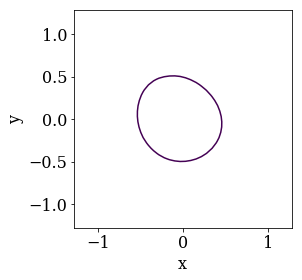

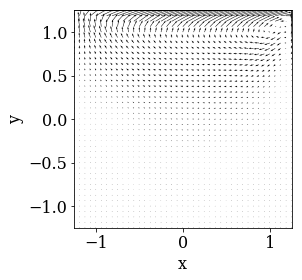

Level Set Advection Time:  0.11197686195373535
------------ Time = 1.6009999999999345 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7086192971590406e-13
Total poisson time : 0.0005161762237548828
Total INS time : 0.0013909339904785156
Max, Min, U   : 2.0, -0.1921394106151281
Max, Min, V   : 0.4258492541981552, -0.4730407506452116
Max, Min, P   : 0.6894989369849137, -0.22312350967959915
Max, Min, DIV : 1.4432899320127035e-15, -1.1726730697603216e-15


Level Set Advection Time:  0.11649203300476074
------------ Time = 1.6019999999999344 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4378166479405693e-13
Total poisson time : 0.003170013427734375
Total INS time : 0.010357856750488281
Max, Min, U   : 2.0, -0.19217330987654968
Max, Min, V   : 0.42587002411905295, -0.4731076719767157
Max, Min, P   : 0.6747396847289847, -0.2379017015841808
Max, Min, DIV : 1.3079815008865125e-15, -1.4363510381087963e-15


Level Set Advection

Level Set Advection Time:  0.15187931060791016
------------ Time = 1.6189999999999325 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.501389824556903e-13
Total poisson time : 0.0007679462432861328
Total INS time : 0.0037069320678710938
Max, Min, U   : 2.0, -0.1927261858215671
Max, Min, V   : 0.42621672753707124, -0.4742291076354832
Max, Min, P   : 0.6778467539834165, -0.23511298862144878
Max, Min, DIV : 1.5785983631388945e-15, -1.4155343563970746e-15


Level Set Advection Time:  0.09947800636291504
------------ Time = 1.6199999999999324 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1852354776673653e-13
Total poisson time : 0.0013270378112792969
Total INS time : 0.005429983139038086
Max, Min, U   : 2.0, -0.19275733547268223
Max, Min, V   : 0.4262367504982095, -0.474294128895858
Max, Min, P   : 0.6789048153641817, -0.23407343579294307
Max, Min, DIV : 1.5543122344752192e-15, -1.6237011735142914e-15


Level Set Advection

Level Set Advection Time:  0.10069513320922852
------------ Time = 1.6369999999999305 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7111762872168096e-13
Total poisson time : 0.0013828277587890625
Total INS time : 0.0052678585052490234
Max, Min, U   : 2.0, -0.19326371007947185
Max, Min, V   : 0.4265709540536895, -0.47538368446208185
Max, Min, P   : 0.6948469197825723, -0.21844541474921395
Max, Min, DIV : 1.1188966420050406e-15, -1.2038980923279041e-15


Level Set Advection Time:  0.1221921443939209
------------ Time = 1.6379999999999304 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8080712234822654e-13
Total poisson time : 0.0010449886322021484
Total INS time : 0.0070040225982666016
Max, Min, U   : 2.0, -0.19329213828885702
Max, Min, V   : 0.4265902535756615, -0.47544685527477415
Max, Min, P   : 0.6838448979672176, -0.22946555127738147
Max, Min, DIV : 1.1934897514720433e-15, -1.5005358067199381e-15


Level Set Advec

Level Set Advection Time:  0.11123824119567871
------------ Time = 1.6549999999999285 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6997260305377585e-13
Total poisson time : 0.0008823871612548828
Total INS time : 0.003206968307495117
Max, Min, U   : 2.0, -0.1937525972595301
Max, Min, V   : 0.42691228487248717, -0.47650525609578487
Max, Min, P   : 0.6956009586289541, -0.21865663958678763
Max, Min, DIV : 1.4016565685892601e-15, -1.2212453270876722e-15


Level Set Advection Time:  0.10115790367126465
------------ Time = 1.6559999999999284 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6087584628391626e-13
Total poisson time : 0.000965118408203125
Total INS time : 0.0045359134674072266
Max, Min, U   : 2.0, -0.1937783393032781
Max, Min, V   : 0.42693087973553895, -0.4765666178276441
Max, Min, P   : 0.6737167635810706, -0.24056990317489946
Max, Min, DIV : 1.5126788710517758e-15, -1.3600232051658168e-15


Level Set Advecti

Level Set Advection Time:  0.09253406524658203
------------ Time = 1.6729999999999265 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5163049836236714e-13
Total poisson time : 0.0006089210510253906
Total INS time : 0.0032410621643066406
Max, Min, U   : 2.0, -0.19419325776780022
Max, Min, V   : 0.4272412115194522, -0.4775947929443832
Max, Min, P   : 0.669070204785023, -0.24570897291588728
Max, Min, DIV : 1.6232674926452972e-15, -1.3114509478384662e-15


Level Set Advection Time:  0.10138583183288574
------------ Time = 1.6739999999999264 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4270235960135937e-13
Total poisson time : 0.0009889602661132812
Total INS time : 0.004225969314575195
Max, Min, U   : 2.0, -0.19421633525152374
Max, Min, V   : 0.42725913017073897, -0.47765440101834244
Max, Min, P   : 0.6885403098391362, -0.22626601531659346
Max, Min, DIV : 1.4155343563970746e-15, -1.6861512186494565e-15


Level Set Advect

Level Set Advection Time:  0.11271500587463379
------------ Time = 1.6899999999999247 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7277114846611784e-13
Total poisson time : 0.0010292530059814453
Total INS time : 0.004490852355957031
Max, Min, U   : 2.0, -0.19456527225375395
Max, Min, V   : 0.4275409731577046, -0.4785953351195199
Max, Min, P   : 0.6903184219395796, -0.22546453714217113
Max, Min, DIV : 1.3322676295501878e-15, -1.5230872119076366e-15


Level Set Advection Time:  0.09791207313537598
------------ Time = 1.6909999999999246 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3048546575473737e-13
Total poisson time : 0.0010521411895751953
Total INS time : 0.0047380924224853516
Max, Min, U   : 2.0, -0.19458581647051862
Max, Min, V   : 0.4275582898877154, -0.4786533534295707
Max, Min, P   : 0.665635266266109, -0.2501838855873234
Max, Min, DIV : 1.6375789613221059e-15, -1.3877787807814457e-15


Level Set Advection

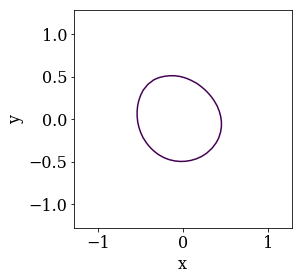

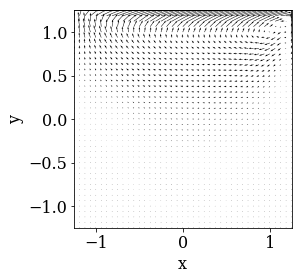

Level Set Advection Time:  0.11030125617980957
------------ Time = 1.7009999999999235 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1698775843159365e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.0017740726470947266
Max, Min, U   : 2.0, -0.19478327097612383
Max, Min, V   : 0.42772950512864405, -0.47922841155476203
Max, Min, P   : 0.6850493442932507, -0.2311320046753535
Max, Min, DIV : 1.3322676295501878e-15, -1.2490009027033011e-15


Level Set Advection Time:  0.15074610710144043
------------ Time = 1.7019999999999234 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1643881599494106e-13
Total poisson time : 0.0014269351959228516
Total INS time : 0.010493040084838867
Max, Min, U   : 2.0, -0.19480221981775575
Max, Min, V   : 0.4277464329482816, -0.47928540787978496
Max, Min, P   : 0.6735116335205853, -0.24270595861383204
Max, Min, DIV : 1.3877787807814457e-15, -1.519617764955683e-15


Level Set Advect

Level Set Advection Time:  0.09821176528930664
------------ Time = 1.7189999999999215 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3653089377832507e-13
Total poisson time : 0.0015630722045898438
Total INS time : 0.006390094757080078
Max, Min, U   : 2.0, -0.19510233140600433
Max, Min, V   : 0.4280289140316725, -0.48024036567244666
Max, Min, P   : 0.6618243116992, -0.25500983938070654
Max, Min, DIV : 1.3877787807814457e-15, -1.4710455076283324e-15


Level Set Advection Time:  0.11600995063781738
------------ Time = 1.7199999999999214 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2141630435031405e-13
Total poisson time : 0.0009520053863525391
Total INS time : 0.00455927848815918
Max, Min, U   : 2.0, -0.19511869551326086
Max, Min, V   : 0.42804522310728105, -0.4802957249563737
Max, Min, P   : 0.6792548862007527, -0.23761554893481185
Max, Min, DIV : 1.5894403848637495e-15, -1.5265566588595902e-15


Level Set Advection 

Level Set Advection Time:  0.1128699779510498
------------ Time = 1.7359999999999196 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6419648972324165e-13
Total poisson time : 0.0011148452758789062
Total INS time : 0.004472017288208008
Max, Min, U   : 2.0, -0.19536119109743086
Max, Min, V   : 0.4283016247494397, -0.4811693662554954
Max, Min, P   : 0.6973652906555671, -0.22008568018277494
Max, Min, DIV : 1.6102570665754712e-15, -1.5317608292875207e-15


Level Set Advection Time:  0.10556316375732422
------------ Time = 1.7369999999999195 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3207110032111427e-13
Total poisson time : 0.0008018016815185547
Total INS time : 0.0037467479705810547
Max, Min, U   : 2.0, -0.19537514414724866
Max, Min, V   : 0.42831736923745806, -0.4812232187957128
Max, Min, P   : 0.668850196709079, -0.24863704869164757
Max, Min, DIV : 1.2212453270876722e-15, -1.4432899320127035e-15


Level Set Advectio

Level Set Advection Time:  0.09739303588867188
------------ Time = 1.7529999999999177 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9110095730160335e-13
Total poisson time : 0.001123189926147461
Total INS time : 0.0063571929931640625
Max, Min, U   : 2.0, -0.19557930027079548
Max, Min, V   : 0.42856488883094734, -0.482073051926813
Max, Min, P   : 0.6990744961256643, -0.21899275114905528
Max, Min, DIV : 1.5543122344752192e-15, -1.3183898417423734e-15


Level Set Advection Time:  0.0973978042602539
------------ Time = 1.7539999999999176 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2488981464680943e-13
Total poisson time : 0.0009281635284423828
Total INS time : 0.0038750171661376953
Max, Min, U   : 2.0, -0.1955908720325794
Max, Min, V   : 0.4285800875935986, -0.48212543504211
Max, Min, P   : 0.6752679524902118, -0.24283539106667126
Max, Min, DIV : 1.1882855810441129e-15, -1.3322676295501878e-15


Level Set Advection T

Level Set Advection Time:  0.11280488967895508
------------ Time = 1.7709999999999158 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6593666750645668e-13
Total poisson time : 0.0007650852203369141
Total INS time : 0.0038700103759765625
Max, Min, U   : 2.0, -0.1957663940757051
Max, Min, V   : 0.42883370136706184, -0.48300300616887143
Max, Min, P   : 0.6599888236365333, -0.25871077965488554
Max, Min, DIV : 1.5404344466674047e-15, -1.7208456881689926e-15


Level Set Advection Time:  0.1155703067779541
------------ Time = 1.7719999999999156 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.257249145753637e-13
Total poisson time : 0.0015208721160888672
Total INS time : 0.005409955978393555
Max, Min, U   : 2.0, -0.19577547800613368
Max, Min, V   : 0.4288483431108256, -0.4830538737789938
Max, Min, P   : 0.6717560611954665, -0.24697852116561184
Max, Min, DIV : 1.1587952819525071e-15, -1.5543122344752192e-15


Level Set Advectio

Level Set Advection Time:  0.08596491813659668
------------ Time = 1.7899999999999137 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.595890238706944e-13
Total poisson time : 0.0007181167602539062
Total INS time : 0.0037941932678222656
Max, Min, U   : 2.0, -0.19642682624738725
Max, Min, V   : 0.4291067651604396, -0.48395541207058085
Max, Min, P   : 0.6924786344915954, -0.22688364906042807
Max, Min, DIV : 1.2212453270876722e-15, -1.3834419720915037e-15


Level Set Advection Time:  0.0921180248260498
------------ Time = 1.7909999999999136 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.728033484074974e-13
Total poisson time : 0.0004987716674804688
Total INS time : 0.004196882247924805
Max, Min, U   : 2.0, -0.19648092527101818
Max, Min, V   : 0.4291208408991377, -0.4840047230540756
Max, Min, P   : 0.7020820827835446, -0.21731495516923136
Max, Min, DIV : 1.2802259252708836e-15, -1.0685896612017132e-15


Level Set Advection

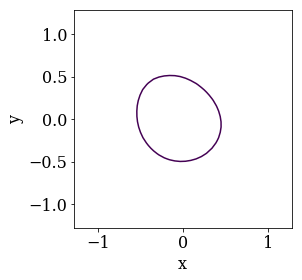

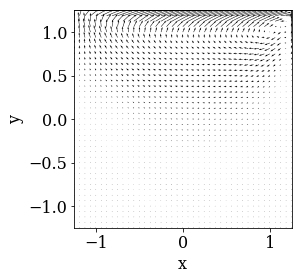

Level Set Advection Time:  0.10052871704101562
------------ Time = 1.8009999999999124 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7626573303176968e-13
Total poisson time : 0.00045418739318847656
Total INS time : 0.0012540817260742188
Max, Min, U   : 2.0, -0.19701454795674642
Max, Min, V   : 0.4292600038849153, -0.48449341289109443
Max, Min, P   : 0.7077061580968191, -0.21203764687650528
Max, Min, DIV : 1.5751289161869408e-15, -1.5543122344752192e-15


Level Set Advection Time:  0.10711979866027832
------------ Time = 1.8019999999999123 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2618543679087274e-13
Total poisson time : 0.0024099349975585938
Total INS time : 0.004672050476074219
Max, Min, U   : 2.0, -0.1970671723089513
Max, Min, V   : 0.4292737620862737, -0.484541842491966
Max, Min, P   : 0.6726780933209272, -0.2471003066889726
Max, Min, DIV : 1.5543122344752192e-15, -1.5386997231914279e-15


Level Set Advectio

Level Set Advection Time:  0.1323699951171875
------------ Time = 1.8189999999999105 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3266250588216218e-13
Total poisson time : 0.0011463165283203125
Total INS time : 0.0039520263671875
Max, Min, U   : 2.0, -0.19794117691036114
Max, Min, V   : 0.42950334416259534, -0.48535309745241184
Max, Min, P   : 0.6867156819231041, -0.23371569309308204
Max, Min, DIV : 1.27675647831893e-15, -1.429412144204889e-15


Level Set Advection Time:  0.10187792778015137
------------ Time = 1.8199999999999104 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.208166821850862e-13
Total poisson time : 0.0015490055084228516
Total INS time : 0.006101131439208984
Max, Min, U   : 2.0, -0.19799137447689658
Max, Min, V   : 0.4295165987828483, -0.48540011587940707
Max, Min, P   : 0.6900893356397185, -0.23037708060763032
Max, Min, DIV : 1.582067810090848e-15, -1.1761425167122752e-15


Level Set Advection Tim

Level Set Advection Time:  0.09772229194641113
------------ Time = 1.8369999999999085 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2020372266851073e-13
Total poisson time : 0.002424001693725586
Total INS time : 0.014299869537353516
Max, Min, U   : 2.0, -0.1988240115321152
Max, Min, V   : 0.4297377778617894, -0.4864874202119775
Max, Min, P   : 0.6766123707350905, -0.24444731734845299
Max, Min, DIV : 1.5543122344752192e-15, -1.5543122344752192e-15


Level Set Advection Time:  0.09874892234802246
------------ Time = 1.8379999999999084 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1965277064860592e-13
Total poisson time : 0.0004532337188720703
Total INS time : 0.001589059829711914
Max, Min, U   : 2.0, -0.19887176881795374
Max, Min, V   : 0.42975054768829457, -0.486574412959379
Max, Min, P   : 0.6851518749673761, -0.23594255670905545
Max, Min, DIV : 1.4432899320127035e-15, -1.6653345369377348e-15


Level Set Advection 

Level Set Advection Time:  0.0915682315826416
------------ Time = 1.8559999999999064 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2991538769084285e-13
Total poisson time : 0.0007069110870361328
Total INS time : 0.0038747787475585938
Max, Min, U   : 2.0, -0.1997081114836652
Max, Min, V   : 0.4299759518603641, -0.48812223989632275
Max, Min, P   : 0.6855122241120293, -0.23620421312940304
Max, Min, DIV : 1.56472057533108e-15, -1.4432899320127035e-15


Level Set Advection Time:  0.10361194610595703
------------ Time = 1.8569999999999063 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4570404461970202e-13
Total poisson time : 0.0004439353942871094
Total INS time : 0.0033528804779052734
Max, Min, U   : 2.0, -0.19975327878437418
Max, Min, V   : 0.42998823064188885, -0.488207235394756
Max, Min, P   : 0.6748833562695639, -0.24686743517036297
Max, Min, DIV : 1.1657341758564144e-15, -1.4016565685892601e-15


Level Set Advection

Level Set Advection Time:  0.11203670501708984
------------ Time = 1.8739999999999044 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1925672261441754e-13
Total poisson time : 0.001010894775390625
Total INS time : 0.004211902618408203
Max, Min, U   : 2.0, -0.20050100861394465
Max, Min, V   : 0.43019008324554986, -0.48963545624156646
Max, Min, P   : 0.6870130587550134, -0.23454732132585937
Max, Min, DIV : 1.4849232954361469e-15, -1.5126788710517758e-15


Level Set Advection Time:  0.1042640209197998
------------ Time = 1.8749999999999043 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5106412227648203e-13
Total poisson time : 0.002611875534057617
Total INS time : 0.006203889846801758
Max, Min, U   : 2.0, -0.20054399500189818
Max, Min, V   : 0.4302004467396344, -0.48971815083196485
Max, Min, P   : 0.6945419652981054, -0.2270070185360795
Max, Min, DIV : 1.033895191682177e-15, -1.502270530195915e-15


Level Set Advection T

Level Set Advection Time:  0.09826111793518066
------------ Time = 1.8919999999999024 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2560897844460595e-13
Total poisson time : 0.0010170936584472656
Total INS time : 0.004091024398803711
Max, Min, U   : 2.0, -0.20125217138795662
Max, Min, V   : 0.43036917721714074, -0.49111111466721696
Max, Min, P   : 0.6902729950660925, -0.23160201507304354
Max, Min, DIV : 1.394717674685353e-15, -1.5768636396629176e-15


Level Set Advection Time:  0.09934115409851074
------------ Time = 1.8929999999999023 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3285061173901805e-13
Total poisson time : 0.001068115234375
Total INS time : 0.003944873809814453
Max, Min, U   : 2.0, -0.2012926681043648
Max, Min, V   : 0.4303789666137358, -0.49119216861451453
Max, Min, P   : 0.6775202925091773, -0.24438120846645855
Max, Min, DIV : 1.6930901125533637e-15, -1.3322676295501878e-15


Level Set Advection T

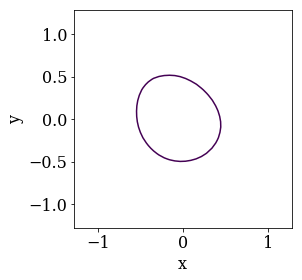

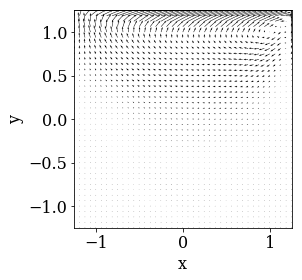

Level Set Advection Time:  0.11020398139953613
------------ Time = 1.9009999999999014 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1849733645323197e-13
Total poisson time : 0.0004711151123046875
Total INS time : 0.0013310909271240234
Max, Min, U   : 2.0, -0.20161228439312345
Max, Min, V   : 0.43045594062566334, -0.4918356580272484
Max, Min, P   : 0.6862331191970816, -0.23460199324882308
Max, Min, DIV : 1.5057399771478686e-15, -1.2212453270876722e-15


Level Set Advection Time:  0.11500191688537598
------------ Time = 1.9019999999999013 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5682779471031838e-13
Total poisson time : 0.000881195068359375
Total INS time : 0.004991054534912109
Max, Min, U   : 2.0, -0.20165198968442766
Max, Min, V   : 0.4304652782565159, -0.49191507974215387
Max, Min, P   : 0.676004873981743, -0.24467763224341466
Max, Min, DIV : 1.457167719820518e-15, -1.304512053934559e-15


Level Set Advection

Max, Min, U   : 2.0, -0.20226672484959168
Max, Min, V   : 0.43061317053719345, -0.4931667751329786
Max, Min, P   : 0.6838879951993407, -0.23660036348871735
Max, Min, DIV : 1.5334955527634975e-15, -1.3877787807814457e-15


Level Set Advection Time:  0.09452390670776367
------------ Time = 1.9189999999998995 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3180568699746476e-13
Total poisson time : 0.0018031597137451172
Total INS time : 0.0043027400970458984
Max, Min, U   : 2.0, -0.20230395229737594
Max, Min, V   : 0.4306222741456656, -0.49324406608825333
Max, Min, P   : 0.6755847191661065, -0.2449219582712151
Max, Min, DIV : 1.7243151351209463e-15, -1.4710455076283324e-15


Level Set Advection Time:  0.0938560962677002
------------ Time = 1.9199999999998993 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1656607654426505e-13
Total poisson time : 0.0012657642364501953
Total INS time : 0.004942178726196289
Max, Min, U   : 2

KeyboardInterrupt: 

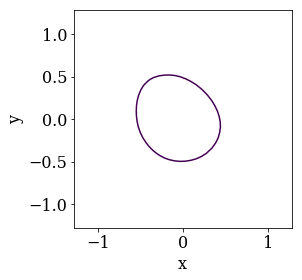

In [4]:
while scalars.time <= scalars.tmax:
    
    ins.advance()
    
    imbound.advect()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        print("Level Set Advection Time: ",imbound._advection_time)
        flowx.io.display_stats(scalars) 
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_vector(gridx,gridy,'velc')
        flowx.io.plot_contour_zero(gridc, 'ibmf')


    scalars.advance()

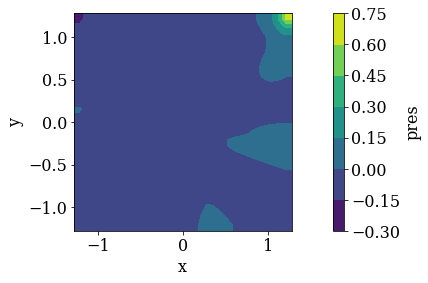

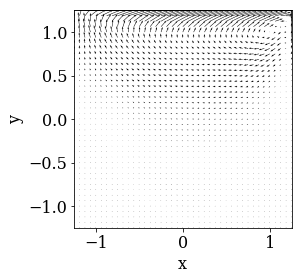

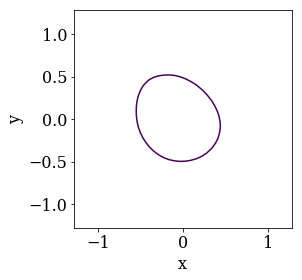

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')
flowx.io.plot_contour_zero(gridc, 'ibmf')

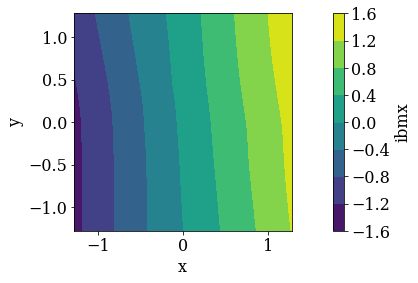

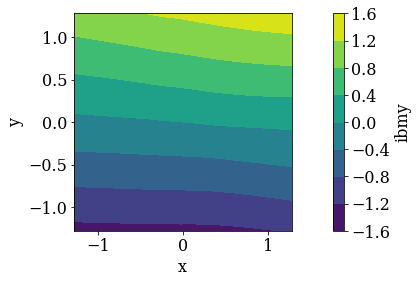

In [6]:
flowx.io.plot_contour(gridc, 'ibmx')
flowx.io.plot_contour(gridc, 'ibmy')